In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('seaborn-white')

In [3]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
LARGE_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=LARGE_SIZE)     
plt.rc('axes', titlesize=MEDIUM_SIZE)    
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('axes', linewidth=0.5) 
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE) 
plt.rc('legend', fontsize=MEDIUM_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE, dpi=300, figsize=(5,4) )  

In [4]:
path_to_data="../data/"
path_to_results="../results/"

In [5]:
plt_df0=pd.read_csv(path_to_data+"Data_for_Figure6AB.tsv",sep="\t",index_col=0)
plt_df0.head()

,NAME,DEPMAPID,SEX,AGE,SITE_OF_FINDING,SAMPLE_TYPE,PRIMARY_SITE,PURITY,MUTATION_RATE,DOUBLING_TIME,...,BRCA1_homdel,FANCC_homdel,FANCL_homdel,RAD51B_homdel,HRR_homdel,HRR_LOH,HRR_nonLOH,HRR_unknown,BRCA_alteration,HA_cases
DMS53_LUNG,DMS 53,ACH-000698,Male,54.0,NaN,Primary,Lung,0.99,157.241638,450.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SW1116_LARGE_INTESTINE,SW1116,ACH-000489,Male,73.0,NaN,Primary,Large_Intestine,0.97,94.373192,123.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCIH1694_LUNG,NCI-H1694,ACH-000431,Male,61.0,ascites,Metastasis,Lung,0.99,109.534987,81.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UMUC3_URINARY_TRACT,UM-UC-3,ACH-000522,Male,NaN,NaN,Primary,Urinary_Tract,0.98,124.707962,386.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
HOS_BONE,HOS,ACH-000613,Female,13.0,NaN,Primary,Bone,0.99,127.979671,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
plt_df0.shape

(1005, 105)

# Supplementary Figure13ABC

## HRD score

In [7]:
# sorted by HRD_score
plt_df=plt_df0.copy()
value="HRD_score"
plt_df=plt_df.dropna(subset=[value]).sort_values(by=value,ascending=False)
print(len(plt_df))

1005


BRCA1_LOH  p=3.50e-04
BRCA2_LOH  p=1.21e-01
HRR_LOH  p=2.47e-04
BRCA1_nonLOH  p=5.35e-01
BRCA2_nonLOH  p=1.03e-03
HRR_nonLOH  p=8.33e-05


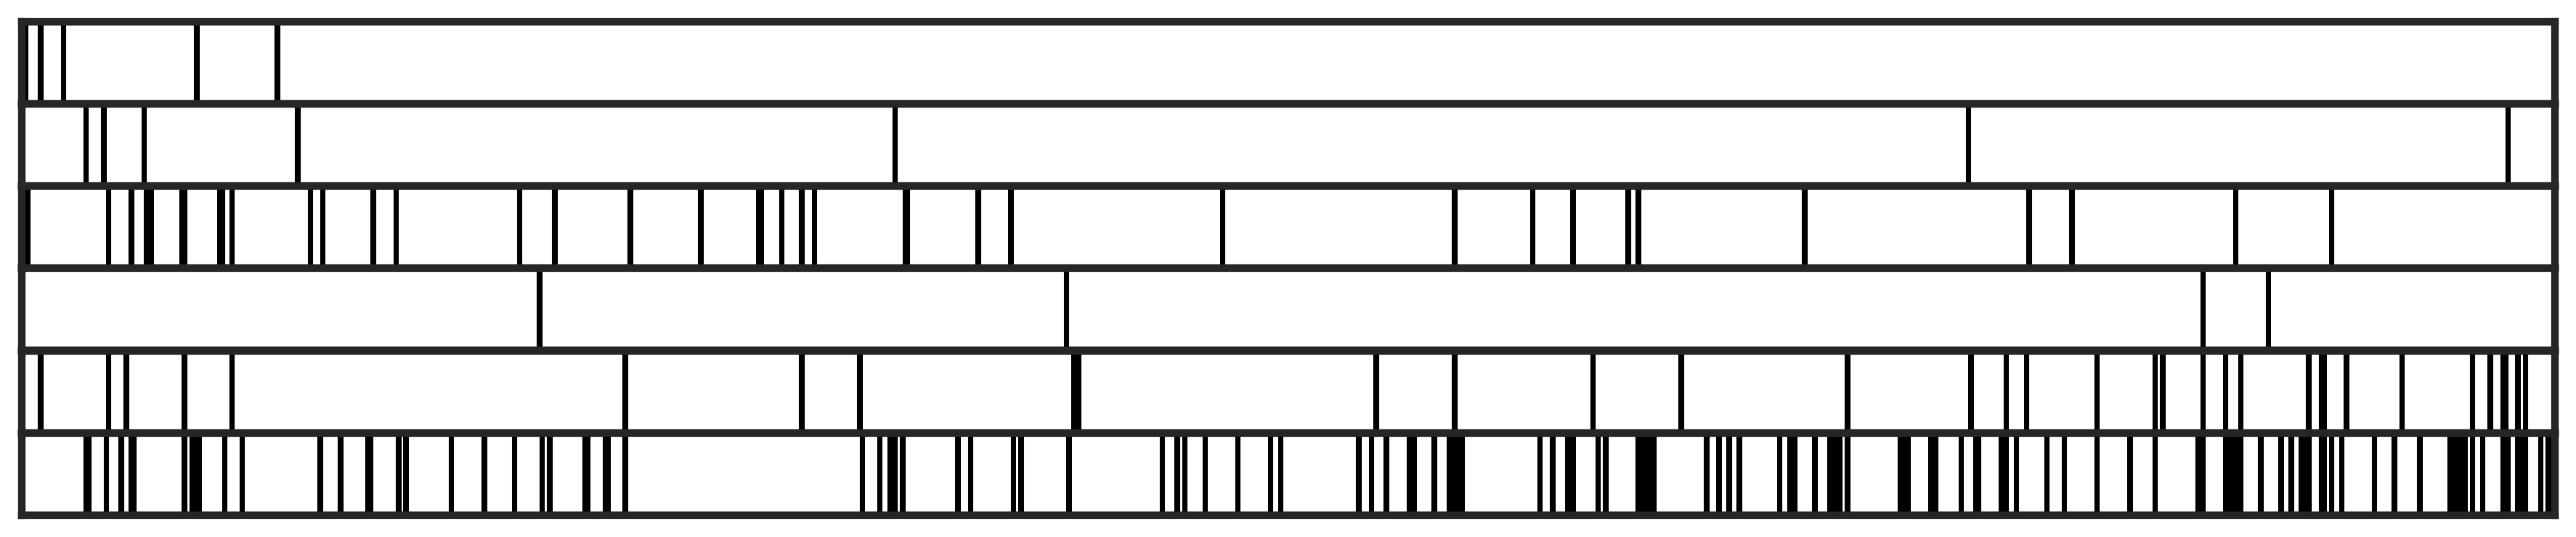

In [8]:
from matplotlib import patches
cols=['BRCA1_LOH', 'BRCA2_LOH', 'HRR_LOH', 'BRCA1_nonLOH', 'BRCA2_nonLOH','HRR_nonLOH',]#  "BRCA1_unknown","BRCA2_unknown","HRR_unknown",
N=plt_df.shape[0]
m=len(cols)

fig = plt.figure(figsize=(15,0.5*m))
for i,col in enumerate(cols):
    ax=fig.add_subplot(m,1,i+1)
    for j in range(N):
        if plt_df[col][j]==1:
            r=patches.Rectangle(xy=(j/N,0),width=1/N,height=1,color="k")
            ax.add_patch(r)
    ax.set_xticks([])
    ax.set_yticks([])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2.5)
    
    # Man-Whitney test
    a,b=plt_df[plt_df[col]==1][value],plt_df[plt_df[col]!=1][value]
    _,p=stats.mannwhitneyu(a,b)
    print(col, " p={:.2e}".format(p) )
        
plt.subplots_adjust(hspace=0)

plt.savefig(path_to_results+"Supplementary_Figure13_1.png",bbox_inches="tight")

In [9]:
# calculate p_values 
dict_gene_p_diff={ "p-value":{},"mean difference":{} }
for col in cols:
    a=plt_df.loc[ plt_df[col]==1,value].values
    b=plt_df.loc[ plt_df[col]==0 ,value].values
    c=np.mean(a )-np.mean(b)
    _,p=stats.mannwhitneyu(a,b)
    dict_gene_p_diff["p-value"][col]="{:.2e}".format(p)
    dict_gene_p_diff["mean difference"][col]=np.round(c,2)

table=pd.DataFrame.from_dict(dict_gene_p_diff)
table["p<0.05"]=( np.array(table["p-value"],dtype=float)<0.05).astype(int)
table["p<1e-2"]=( np.array(table["p-value"],dtype=float)<0.01).astype(int)
table["p<1e-3"]=( np.array(table["p-value"],dtype=float)<0.001).astype(int)
table.to_csv(path_to_results+"Supplementary_Figure13_1_p_diff_table.tsv",sep="\t")
table

,p-value,mean difference,p<0.05,p<1e-2,p<1e-3
BRCA1_LOH,3.50e-04,45.10,1,1,1
BRCA2_LOH,1.21e-01,14.09,0,0,0
HRR_LOH,2.47e-04,12.35,1,1,1
BRCA1_nonLOH,5.35e-01,-6.75,0,0,0
BRCA2_nonLOH,1.03e-03,-9.51,1,1,0
HRR_nonLOH,8.33e-05,-6.81,1,1,1


HRR_homdel  p=2.37e-02
BRCA1_methylation  p=1.34e-03


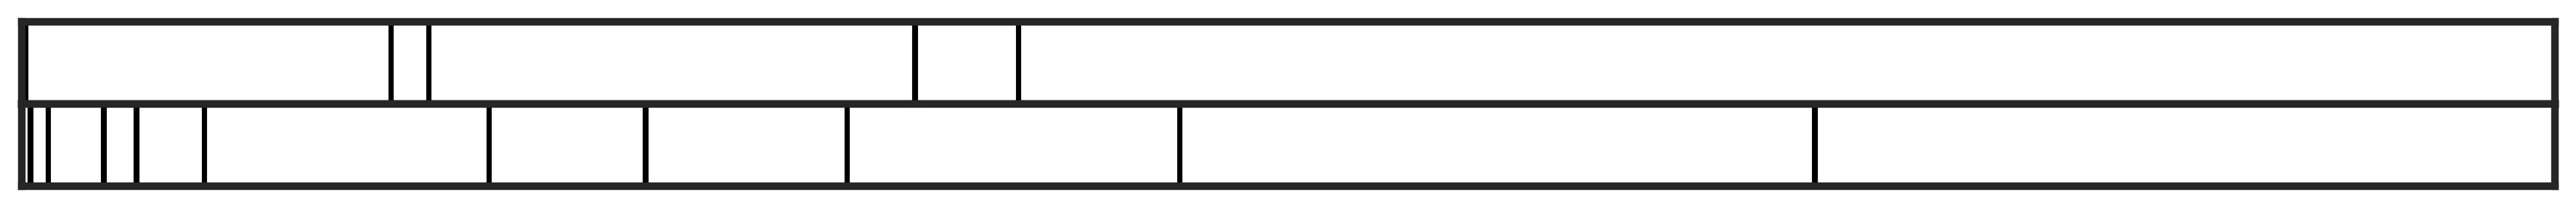

In [10]:
from matplotlib import patches
cols=["HRR_homdel","BRCA1_methylation"]#  "BRCA1_unknown","BRCA2_unknown","HRR_unknown",
N=plt_df.shape[0]
m=len(cols)

fig = plt.figure(figsize=(15,0.5*m))
for i,col in enumerate(cols):
    ax=fig.add_subplot(m,1,i+1)
    for j in range(N):
        if plt_df[col][j]==1:
            r=patches.Rectangle(xy=(j/N,0),width=1/N,height=1,color="k")
            ax.add_patch(r)
    ax.set_xticks([])
    ax.set_yticks([])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2.5)
    
    # Man-Whitney test
    a,b=plt_df[plt_df[col]==1][value],plt_df[plt_df[col]!=1][value]
    _,p=stats.mannwhitneyu(a,b)
    print(col, " p={:.2e}".format(p) )
        
plt.subplots_adjust(hspace=0)

plt.savefig(path_to_results+"Supplementary_Figure13_2.png",bbox_inches="tight")

In [11]:
# calculate p_values 
dict_gene_p_diff={ "p-value":{},"mean difference":{} }
for col in cols:
    a=plt_df.loc[ plt_df[col]==1,value].values
    b=plt_df.loc[ plt_df[col]==0 ,value].values
    c=np.mean(a )-np.mean(b)
    _,p=stats.mannwhitneyu(a,b)
    dict_gene_p_diff["p-value"][col]="{:.2e}".format(p)
    dict_gene_p_diff["mean difference"][col]=np.round(c,2)

table=pd.DataFrame.from_dict(dict_gene_p_diff)
table["p<0.05"]=( np.array(table["p-value"],dtype=float)<0.05).astype(int)
table["p<1e-2"]=( np.array(table["p-value"],dtype=float)<0.01).astype(int)
table["p<1e-3"]=( np.array(table["p-value"],dtype=float)<0.001).astype(int)
table.to_csv(path_to_results+"Supplementary_Figure13_2_p_diff_table.tsv",sep="\t")
table

,p-value,mean difference,p<0.05,p<1e-2,p<1e-3
HRR_homdel,2.37e-02,23.99,1,0,0
BRCA1_methylation,1.34e-03,24.62,1,1,0


In [12]:
plt_df[plt_df["HRR_homdel"]==1]

,NAME,DEPMAPID,SEX,AGE,SITE_OF_FINDING,SAMPLE_TYPE,PRIMARY_SITE,PURITY,MUTATION_RATE,DOUBLING_TIME,...,BRCA1_homdel,FANCC_homdel,FANCL_homdel,RAD51B_homdel,HRR_homdel,HRR_LOH,HRR_nonLOH,HRR_unknown,BRCA_alteration,HA_cases
MDAMB436_BREAST,MDA-MB-436,ACH-000573,Female,43.0,pleura,Metastasis,Breast,0.99,151.820687,58.6,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
PC3_PROSTATE,PC-3,ACH-000090,Male,62.0,bone,Metastasis,Prostate,1.00,80.193874,42.3,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
LB771HNC_UPPER_AERODIGESTIVE_TRACT,NaN,ACH-002265,Na,NaN,NaN,Na,Na,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
NCIH630_LARGE_INTESTINE,NaN,ACH-002287,Na,NaN,NaN,Na,Na,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
PANC0327_PANCREAS,Panc 03.27,ACH-000139,Female,65.0,NaN,Primary,Pancreas,1.00,87.641676,85.9,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


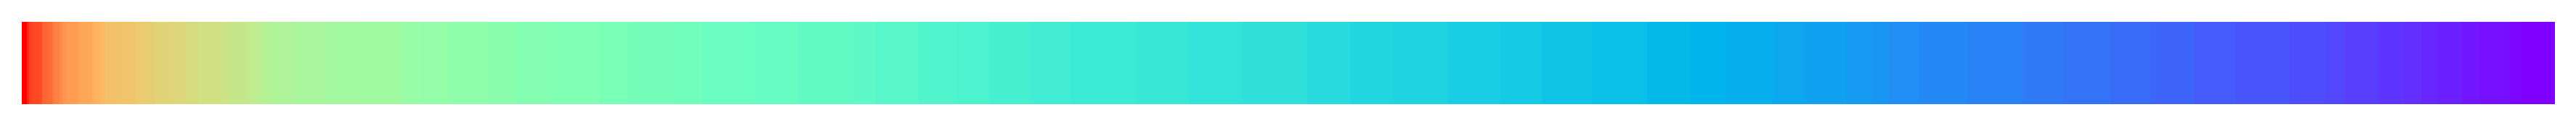

In [13]:
cols=["HRD_score"]
m=1
fig = plt.figure(figsize=(15,0.5*m))
for i,col in enumerate(cols):
    ax=fig.add_subplot(m,1,i+1)
    ax=sns.heatmap(plt_df[[col]].T,cmap="rainbow",cbar=False,vmin=0,vmax=100)
    ax.set_xticks([])
    ax.set_yticks([])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2.5)

plt.subplots_adjust(hspace=0)

plt.savefig(path_to_results+"Supplementary_Figure13_2_2.png",bbox_inches="tight")

In [14]:
# LOH vs nonLOH per alteration
LOH1=plt_df[ plt_df["BRCA1_LOH"]==1][value].values
LOH2=plt_df[ plt_df["BRCA2_LOH"]==1][value].values
LOH3=plt_df[ plt_df["HRR_LOH"]==1][value].values
nonLOH1=plt_df[ plt_df["BRCA1_nonLOH"]==1][value].values
nonLOH2=plt_df[ plt_df["BRCA2_nonLOH"]==1][value].values
nonLOH3=plt_df[ plt_df["HRR_nonLOH"]==1][value].values

data_comp=[LOH1,nonLOH1,LOH2,nonLOH2,LOH3,nonLOH3]

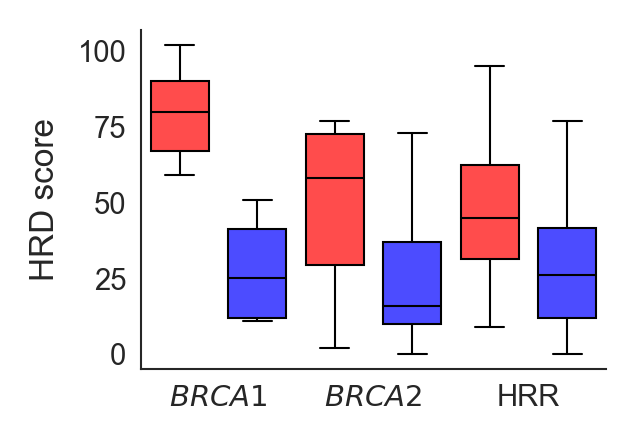

In [15]:
fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*6
# box face color
for b, c in zip(bp['boxes'], colors):
    b.set(color=c, linewidth=0.5) 
    b.set_facecolor(c)
    b.set_edgecolor("k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_ylabel("HRD score",fontsize=MEDIUM_SIZE)
labels=["$BRCA1$","$BRCA2$","HRR"]
ax.set_xticks([1.5,3.5,5.5])
ax.set_xticklabels(labels)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)

plt.savefig(path_to_results+"Supplementary_Figure13_3.png",bbox_inches="tight")

In [16]:
_,p1=stats.mannwhitneyu(LOH1,nonLOH1)
_,p2=stats.mannwhitneyu(LOH2,nonLOH2)
_,p3=stats.mannwhitneyu(LOH3,nonLOH3)
for p in [p1,p2,p3]:
    print( "p = {:.2e}".format(p) )

p = 1.59e-02
p = 5.63e-02
p = 8.43e-06


## Sig3 ratio

In [17]:
# sorted by sig3ratio
plt_df=plt_df0.copy()
value="MSK_Sig3_ratio"
plt_df=plt_df.dropna(subset=[value]).sort_values(by=value,ascending=False)
print(len(plt_df))

985


BRCA1_LOH  p=2.34e-04
BRCA2_LOH  p=2.10e-01
HRR_LOH  p=5.34e-01
BRCA1_nonLOH  p=1.31e-01
BRCA2_nonLOH  p=1.91e-05
HRR_nonLOH  p=1.32e-07


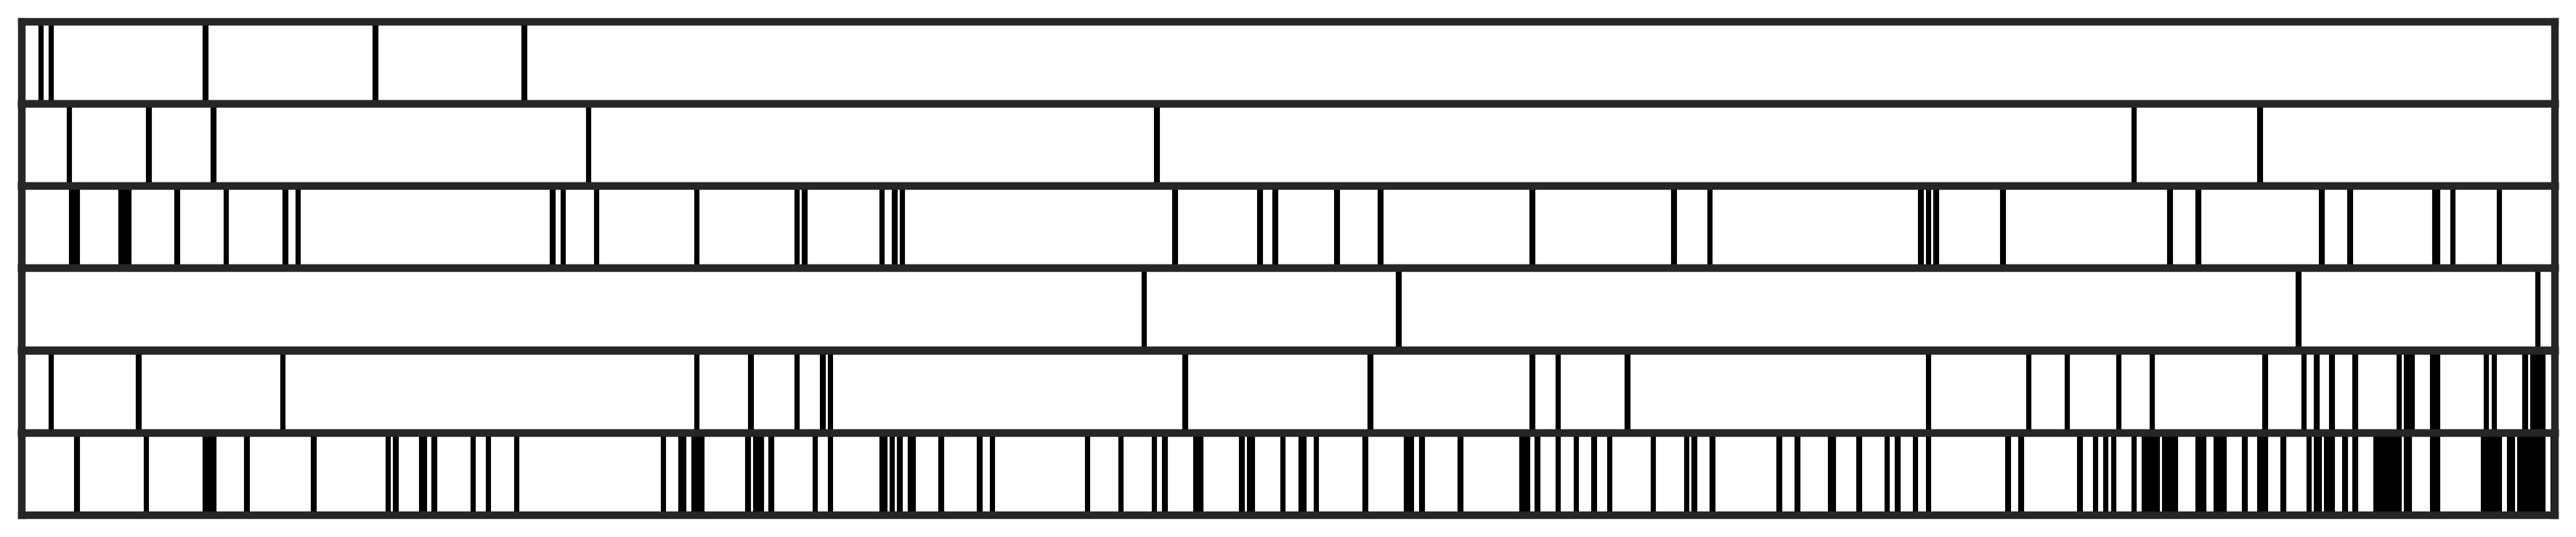

In [18]:
from matplotlib import patches
cols=['BRCA1_LOH', 'BRCA2_LOH', 'HRR_LOH', 'BRCA1_nonLOH', 'BRCA2_nonLOH','HRR_nonLOH']
N=plt_df.shape[0]
m=len(cols)

fig = plt.figure(figsize=(15,0.5*m))
for i,col in enumerate(cols):
    ax=fig.add_subplot(m,1,i+1)
    for j in range(N):
        if plt_df[col][j]==1:
            r=patches.Rectangle(xy=(j/N,0),width=1/N,height=1,color="k")
            ax.add_patch(r)
    ax.set_xticks([])
    ax.set_yticks([])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2.5)
    
    # Man-Whitney test
    a,b=plt_df[plt_df[col]==1][value],plt_df[plt_df[col]!=1][value]
    _,p=stats.mannwhitneyu(a,b)
    print(col, " p={:.2e}".format(p) )
        
plt.subplots_adjust(hspace=0)

plt.savefig(path_to_results+"Supplementary_Figure13_4.png",bbox_inches="tight")

In [19]:
# calculate p_values 
dict_gene_p_diff={ "p-value":{},"mean difference":{} }
for col in cols:
    a=plt_df.loc[ plt_df[col]==1,value].values
    b=plt_df.loc[ plt_df[col]==0 ,value].values
    c=np.mean(a )-np.mean(b)
    _,p=stats.mannwhitneyu(a,b)
    dict_gene_p_diff["p-value"][col]="{:.2e}".format(p)
    dict_gene_p_diff["mean difference"][col]=np.round(c,2)

table=pd.DataFrame.from_dict(dict_gene_p_diff)
table["p<0.05"]=( np.array(table["p-value"],dtype=float)<0.05).astype(int)
table["p<1e-2"]=( np.array(table["p-value"],dtype=float)<0.01).astype(int)
table["p<1e-3"]=( np.array(table["p-value"],dtype=float)<0.001).astype(int)
table.to_csv(path_to_results+"Supplementary_Figure13_4_p_diff_table.tsv",sep="\t")
table

,p-value,mean difference,p<0.05,p<1e-2,p<1e-3
BRCA1_LOH,2.34e-04,0.15,1,1,1
BRCA2_LOH,2.10e-01,0.05,0,0,0
HRR_LOH,5.34e-01,0.01,0,0,0
BRCA1_nonLOH,1.31e-01,-0.07,0,0,0
BRCA2_nonLOH,1.91e-05,-0.06,1,1,1
HRR_nonLOH,1.32e-07,-0.04,1,1,1


HRR_homdel  p=5.87e-02
BRCA1_methylation  p=6.04e-03


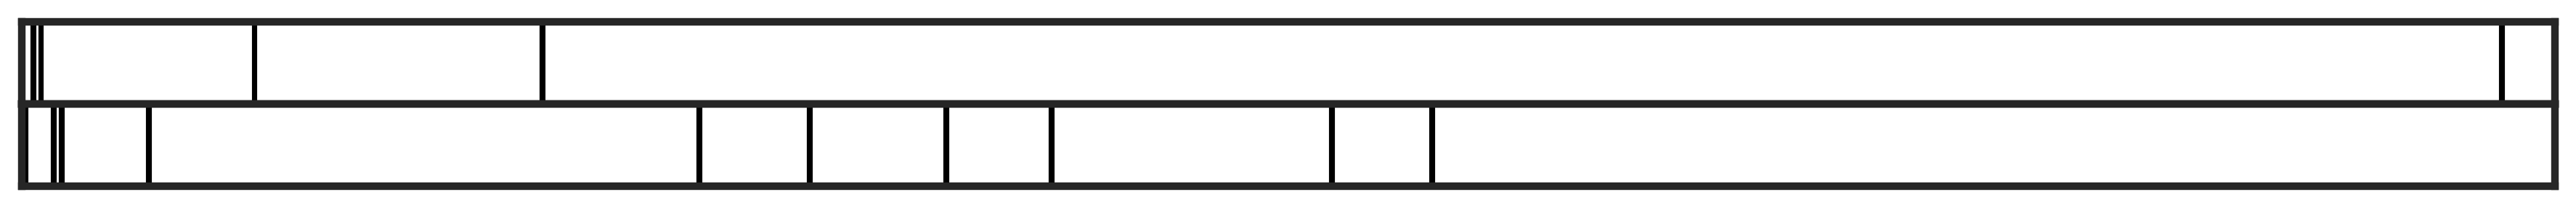

In [20]:
from matplotlib import patches
cols=["HRR_homdel","BRCA1_methylation"]
N=plt_df.shape[0]
m=len(cols)

fig = plt.figure(figsize=(15,0.5*m))
for i,col in enumerate(cols):
    ax=fig.add_subplot(m,1,i+1)
    for j in range(N):
        if plt_df[col][j]==1:
            r=patches.Rectangle(xy=(j/N,0),width=1/N,height=1,color="k")
            ax.add_patch(r)
    ax.set_xticks([])
    ax.set_yticks([])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2.5)
    
    # Man-Whitney test
    a,b=plt_df[plt_df[col]==1][value],plt_df[plt_df[col]!=1][value]
    _,p=stats.mannwhitneyu(a,b)
    print(col, " p={:.2e}".format(p) )
        
plt.subplots_adjust(hspace=0)

plt.savefig(path_to_results+"Supplementary_Figure13_5.png",bbox_inches="tight")

In [21]:
# calculate p_values 
dict_gene_p_diff={ "p-value":{},"mean difference":{} }
for col in cols:
    a=plt_df.loc[ plt_df[col]==1,value].values
    b=plt_df.loc[ plt_df[col]==0 ,value].values
    c=np.mean(a )-np.mean(b)
    _,p=stats.mannwhitneyu(a,b)
    dict_gene_p_diff["p-value"][col]="{:.2e}".format(p)
    dict_gene_p_diff["mean difference"][col]=np.round(c,2)

table=pd.DataFrame.from_dict(dict_gene_p_diff)
table["p<0.05"]=( np.array(table["p-value"],dtype=float)<0.05).astype(int)
table["p<1e-2"]=( np.array(table["p-value"],dtype=float)<0.01).astype(int)
table["p<1e-3"]=( np.array(table["p-value"],dtype=float)<0.001).astype(int)
table.to_csv(path_to_results+"Supplementary_Figure13_5_p_diff_table.tsv",sep="\t")
table

,p-value,mean difference,p<0.05,p<1e-2,p<1e-3
HRR_homdel,5.87e-02,0.12,0,0,0
BRCA1_methylation,6.04e-03,0.10,1,1,0


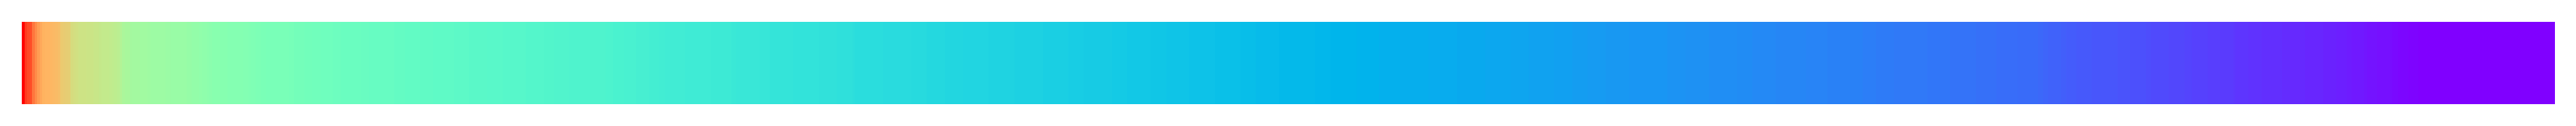

In [22]:
cols=["MSK_Sig3_ratio"]
m=1
fig = plt.figure(figsize=(15,0.5*m))
for i,col in enumerate(cols):
    ax=fig.add_subplot(m,1,i+1)
    ax=sns.heatmap(plt_df[[col]].T,cmap="rainbow",cbar=False,vmin=0,vmax=0.50)
    ax.set_xticks([])
    ax.set_yticks([])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2.5)

plt.subplots_adjust(hspace=0)

plt.savefig(path_to_results+"Supplementary_Figure13_5_2.png",bbox_inches="tight")

In [23]:
# LOH vs nonLOH per alteration
LOH1=plt_df[ plt_df["BRCA1_LOH"]==1][value].values
LOH2=plt_df[ plt_df["BRCA2_LOH"]==1][value].values
LOH3=plt_df[ plt_df["HRR_LOH"]==1][value].values
nonLOH1=plt_df[ plt_df["BRCA1_nonLOH"]==1][value].values
nonLOH2=plt_df[ plt_df["BRCA2_nonLOH"]==1][value].values
nonLOH3=plt_df[ plt_df["HRR_nonLOH"]==1][value].values

data_comp=[LOH1,nonLOH1,LOH2,nonLOH2,LOH3,nonLOH3]

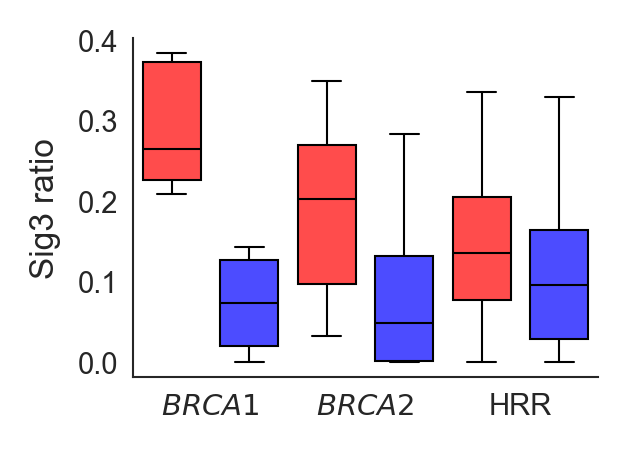

In [24]:
fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*6
# box face color
for b, c in zip(bp['boxes'], colors):
    b.set(color=c, linewidth=0.5) 
    b.set_facecolor(c)
    b.set_edgecolor("k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_ylabel("Sig3 ratio",fontsize=MEDIUM_SIZE)
labels=["$BRCA1$","$BRCA2$","HRR"]
ax.set_xticks([1.5,3.5,5.5])
ax.set_xticklabels(labels)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)

plt.savefig(path_to_results+"Supplementary_Figure13_6.png",bbox_inches="tight")

In [25]:
_,p1=stats.mannwhitneyu(LOH1,nonLOH1)
_,p2=stats.mannwhitneyu(LOH2,nonLOH2)
_,p3=stats.mannwhitneyu(LOH3,nonLOH3)
for p in [p1,p2,p3]:
    print( "p = {:.2e}".format(p) )

p = 1.59e-02
p = 1.41e-02
p = 9.65e-03


##  TMB

In [26]:
# sorted by sig3ratio
plt_df=plt_df0.copy()
value="TMB_log10"
plt_df=plt_df.dropna(subset=[value]).sort_values(by=value,ascending=False)
print(len(plt_df))

1004


BRCA1_LOH  p=4.75e-01
BRCA2_LOH  p=4.84e-01
HRR_LOH  p=2.49e-02
BRCA1_nonLOH  p=2.22e-02
BRCA2_nonLOH  p=6.21e-09
HRR_nonLOH  p=8.67e-16


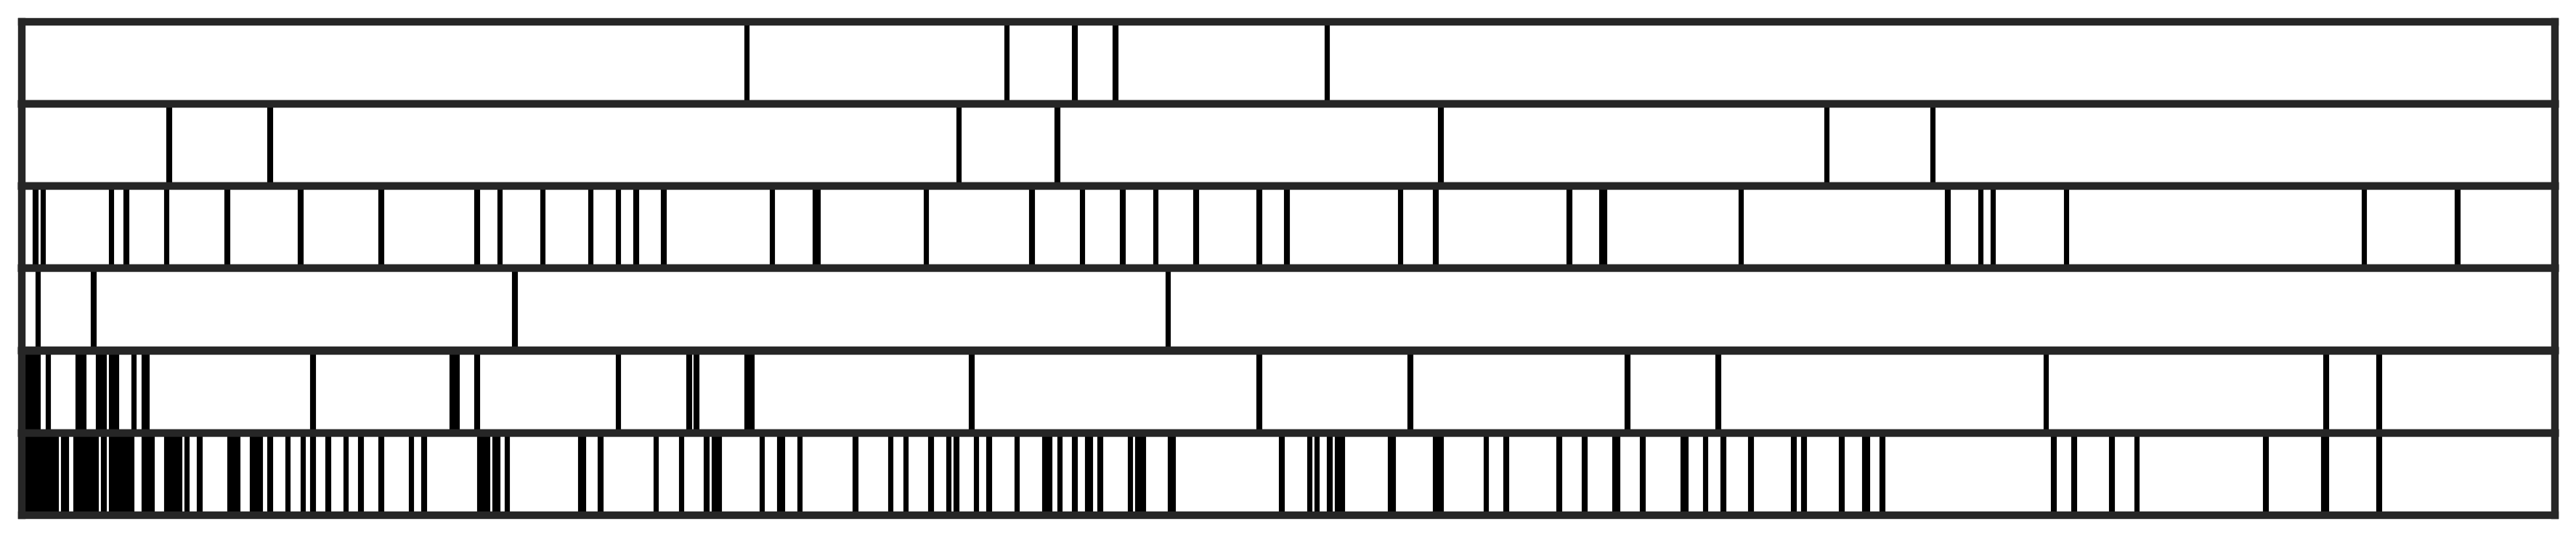

In [27]:
from matplotlib import patches
cols=['BRCA1_LOH', 'BRCA2_LOH', 'HRR_LOH', 'BRCA1_nonLOH', 'BRCA2_nonLOH','HRR_nonLOH',]
N=plt_df.shape[0]
m=len(cols)

fig = plt.figure(figsize=(15,0.5*m))
for i,col in enumerate(cols):
    ax=fig.add_subplot(m,1,i+1)
    for j in range(N):
        if plt_df[col][j]==1:
            r=patches.Rectangle(xy=(j/N,0),width=1/N,height=1,color="k")
            ax.add_patch(r)
    ax.set_xticks([])
    ax.set_yticks([])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2.5)
    
    # Man-Whitney test
    a,b=plt_df[plt_df[col]==1][value],plt_df[plt_df[col]!=1][value]
    _,p=stats.mannwhitneyu(a,b)
    print(col, " p={:.2e}".format(p) )
        
plt.subplots_adjust(hspace=0)

plt.savefig(path_to_results+"Supplementary_Figure13_7.png",bbox_inches="tight")

In [28]:
# calculate p_values 
dict_gene_p_diff={ "p-value":{},"mean difference":{} }
for col in cols:
    a=plt_df.loc[ plt_df[col]==1,value].values
    b=plt_df.loc[ plt_df[col]==0 ,value].values
    c=np.mean(a )-np.mean(b)
    _,p=stats.mannwhitneyu(a,b)
    dict_gene_p_diff["p-value"][col]="{:.2e}".format(p)
    dict_gene_p_diff["mean difference"][col]=np.round(c,2)

table=pd.DataFrame.from_dict(dict_gene_p_diff)
table["p<0.05"]=( np.array(table["p-value"],dtype=float)<0.05).astype(int)
table["p<1e-2"]=( np.array(table["p-value"],dtype=float)<0.01).astype(int)
table["p<1e-3"]=( np.array(table["p-value"],dtype=float)<0.001).astype(int)
table.to_csv(path_to_results+"Supplementary_Figure13_7_p_diff_table.tsv",sep="\t")
table

,p-value,mean difference,p<0.05,p<1e-2,p<1e-3
BRCA1_LOH,4.75e-01,-0.01,0,0,0
BRCA2_LOH,4.84e-01,0.10,0,0,0
HRR_LOH,2.49e-02,0.13,1,0,0
BRCA1_nonLOH,2.22e-02,0.58,1,0,0
BRCA2_nonLOH,6.21e-09,0.57,1,1,1
HRR_nonLOH,8.67e-16,0.35,1,1,1


HRR_homdel  p=8.32e-01
BRCA1_methylation  p=7.39e-01


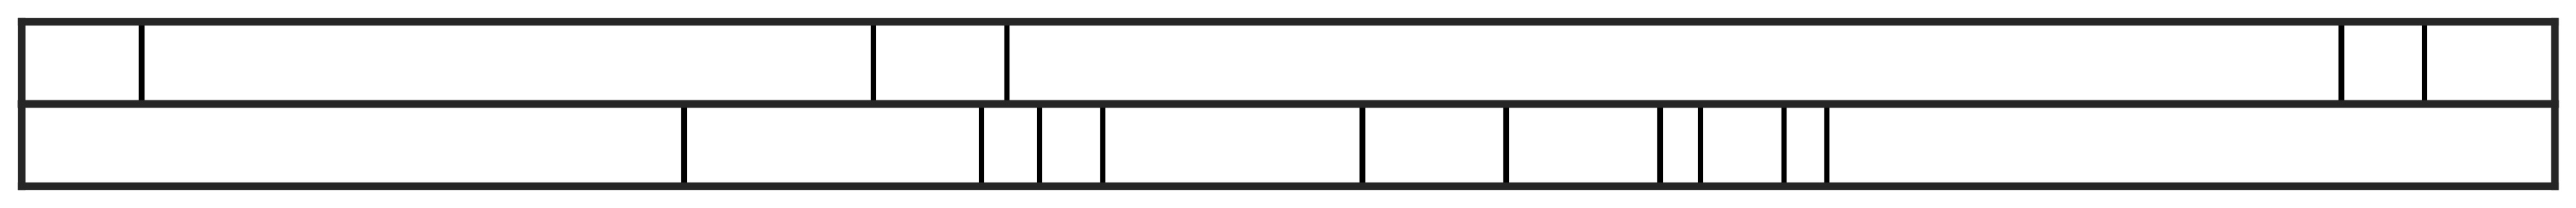

In [29]:
from matplotlib import patches
cols=["HRR_homdel","BRCA1_methylation"]
N=plt_df.shape[0]
m=len(cols)

fig = plt.figure(figsize=(15,0.5*m))
for i,col in enumerate(cols):
    ax=fig.add_subplot(m,1,i+1)
    for j in range(N):
        if plt_df[col][j]==1:
            r=patches.Rectangle(xy=(j/N,0),width=1/N,height=1,color="k")
            ax.add_patch(r)
    ax.set_xticks([])
    ax.set_yticks([])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2.5)
    
    # Man-Whitney test
    a,b=plt_df[plt_df[col]==1][value],plt_df[plt_df[col]!=1][value]
    _,p=stats.mannwhitneyu(a,b)
    print(col, " p={:.2e}".format(p) )
        
plt.subplots_adjust(hspace=0)

plt.savefig(path_to_results+"Supplementary_Figure13_8.png",bbox_inches="tight")

In [30]:
# calculate p_values 
dict_gene_p_diff={ "p-value":{},"mean difference":{} }
for col in cols:
    a=plt_df.loc[ plt_df[col]==1,value].values
    b=plt_df.loc[ plt_df[col]==0 ,value].values
    c=np.mean(a )-np.mean(b)
    _,p=stats.mannwhitneyu(a,b)
    dict_gene_p_diff["p-value"][col]="{:.2e}".format(p)
    dict_gene_p_diff["mean difference"][col]=np.round(c,2)

table=pd.DataFrame.from_dict(dict_gene_p_diff)
table["p<0.05"]=( np.array(table["p-value"],dtype=float)<0.05).astype(int)
table["p<1e-2"]=( np.array(table["p-value"],dtype=float)<0.01).astype(int)
table["p<1e-3"]=( np.array(table["p-value"],dtype=float)<0.001).astype(int)
table.to_csv(path_to_results+"Supplementary_Figure13_8_p_diff_table.tsv",sep="\t")
table

,p-value,mean difference,p<0.05,p<1e-2,p<1e-3
HRR_homdel,8.32e-01,0.01,0,0,0
BRCA1_methylation,7.39e-01,-0.08,0,0,0


In [31]:
plt_df["MSI-high"]=(plt_df["CCLE.MSI.call"]=="inferred-MSI").astype(float)

MSI-high  p=6.17e-43
POLE_mut  p=6.48e-05


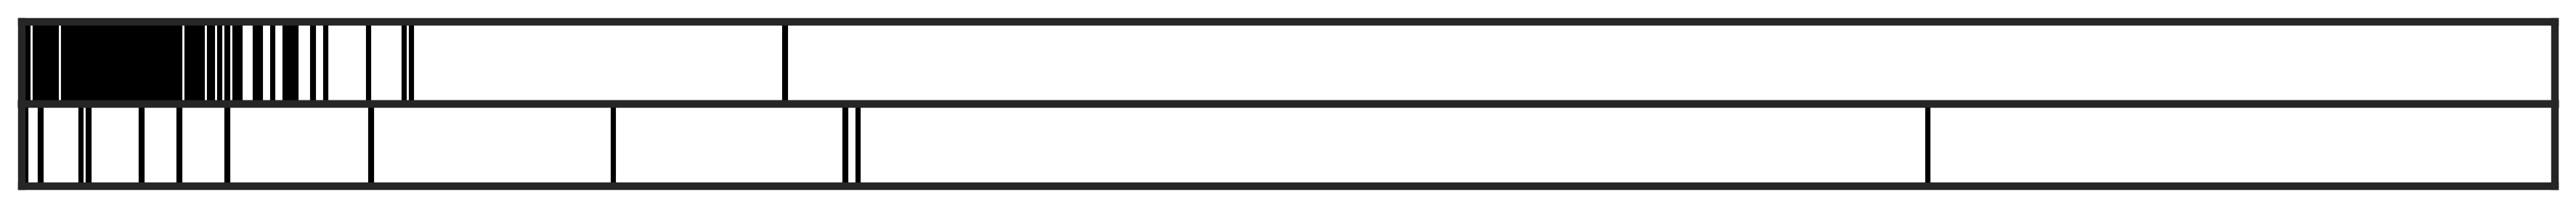

In [32]:
from matplotlib import patches
cols=["MSI-high","POLE_mut"]
N=plt_df.shape[0]
m=len(cols)

fig = plt.figure(figsize=(15,0.5*m))
for i,col in enumerate(cols):
    ax=fig.add_subplot(m,1,i+1)
    for j in range(N):
        if plt_df[col][j]==1:
            r=patches.Rectangle(xy=(j/N,0),width=1/N,height=1,color="k")
            ax.add_patch(r)
    ax.set_xticks([])
    ax.set_yticks([])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2.5)
    
    # Man-Whitney test
    a,b=plt_df[plt_df[col]==1][value],plt_df[plt_df[col]!=1][value]
    _,p=stats.mannwhitneyu(a,b)
    print(col, " p={:.2e}".format(p) )
        
plt.subplots_adjust(hspace=0)

plt.savefig(path_to_results+"Supplementary_Figure13_8_2.png",bbox_inches="tight")

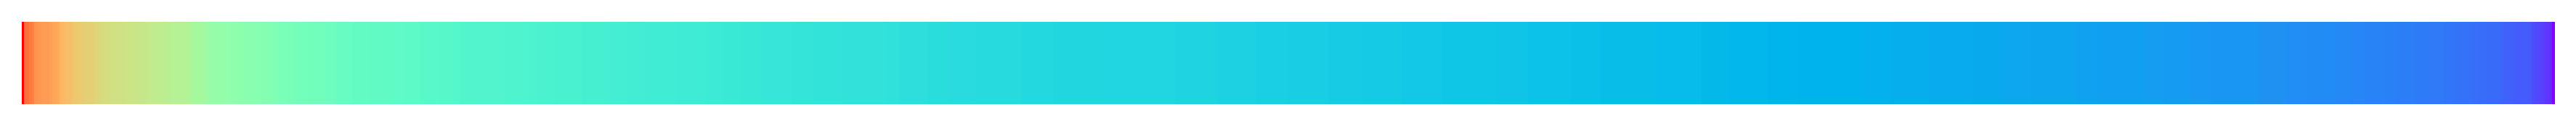

In [33]:
cols=["TMB_log10"]
m=1
fig = plt.figure(figsize=(15,0.5*m))
for i,col in enumerate(cols):
    ax=fig.add_subplot(m,1,i+1)
    ax=sns.heatmap(plt_df[[col]].T,cmap="rainbow",cbar=False)
    ax.set_xticks([])
    ax.set_yticks([])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2.5)

plt.subplots_adjust(hspace=0)

plt.savefig(path_to_results+"Supplementary_Figure13_8_3.png",bbox_inches="tight")

In [34]:
# LOH vs nonLOH per alteration
LOH1=plt_df[ plt_df["BRCA1_LOH"]==1][value].values
LOH2=plt_df[ plt_df["BRCA2_LOH"]==1][value].values
LOH3=plt_df[ plt_df["HRR_LOH"]==1][value].values
nonLOH1=plt_df[ plt_df["BRCA1_nonLOH"]==1][value].values
nonLOH2=plt_df[ plt_df["BRCA2_nonLOH"]==1][value].values
nonLOH3=plt_df[ plt_df["HRR_nonLOH"]==1][value].values

data_comp=[LOH1,nonLOH1,LOH2,nonLOH2,LOH3,nonLOH3]

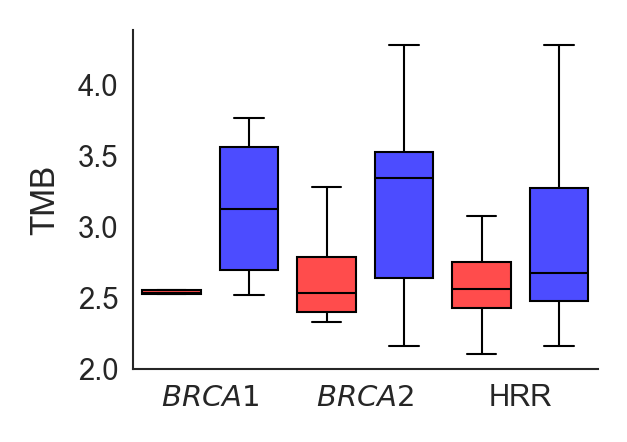

In [35]:
fig = plt.figure(figsize=(2,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*6
# box face color
for b, c in zip(bp['boxes'], colors):
    b.set(color=c, linewidth=0.5) 
    b.set_facecolor(c)
    b.set_edgecolor("k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_ylabel("TMB",fontsize=MEDIUM_SIZE)
labels=["$BRCA1$","$BRCA2$","HRR"]
ax.set_xticks([1.5,3.5,5.5])
ax.set_xticklabels(labels)
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)

plt.savefig(path_to_results+"Supplementary_Figure13_9.png",bbox_inches="tight")

In [36]:
_,p1=stats.mannwhitneyu(LOH1,nonLOH1)
_,p2=stats.mannwhitneyu(LOH2,nonLOH2)
_,p3=stats.mannwhitneyu(LOH3,nonLOH3)
for p in [p1,p2,p3]:
    print( "p = {:.2e}".format(p) )
#plt.savefig(path_to_results+"Figure1C_6.png",bbox_inches="tight")

p = 1.90e-01
p = 3.43e-02
p = 6.71e-02


# Supplementary Figure 14A

In [37]:
# LOH vs nonLOH per alteration
value="HRD_score"
plt_df2=plt_df.dropna(subset=[value])
c1=plt_df2.loc[(plt_df2["HA_cases"]==1) & (plt_df2["SEX"]=="Female") & (plt_df2["TP53_mut"]==1), value].values
c2=plt_df2.loc[(plt_df2["HA_cases"]==1) & (plt_df2["SEX"]=="Male") & (plt_df2["TP53_mut"]==1), value].values
c3=plt_df2.loc[(plt_df2["HA_cases"]==1) & (plt_df2["SEX"]=="Female") & (plt_df2["TP53_mut"]==0), value].values
c4=plt_df2.loc[(plt_df2["HA_cases"]==1) & (plt_df2["SEX"]=="Male") & (plt_df2["TP53_mut"]==0), value].values
c5=plt_df2.loc[(plt_df2["HA_cases"]==0) & (plt_df2["SEX"]=="Female") & (plt_df2["TP53_mut"]==1), value].values
c6=plt_df2.loc[(plt_df2["HA_cases"]==0) & (plt_df2["SEX"]=="Male") & (plt_df2["TP53_mut"]==1), value].values
c7=plt_df2.loc[(plt_df2["HA_cases"]==0) & (plt_df2["SEX"]=="Female") & (plt_df2["TP53_mut"]==0), value].values
c8=plt_df2.loc[(plt_df2["HA_cases"]==0) & (plt_df2["SEX"]=="Male") & (plt_df2["TP53_mut"]==0), value].values

data_comp=[c1,c2,c3,c4,c5,c6,c7,c8]

p = 2.52e-01
p = 8.04e-01
p = 4.68e-01
p = 8.19e-01
p = 1.45e-01
p = 6.63e-03
p = 5.40e-02


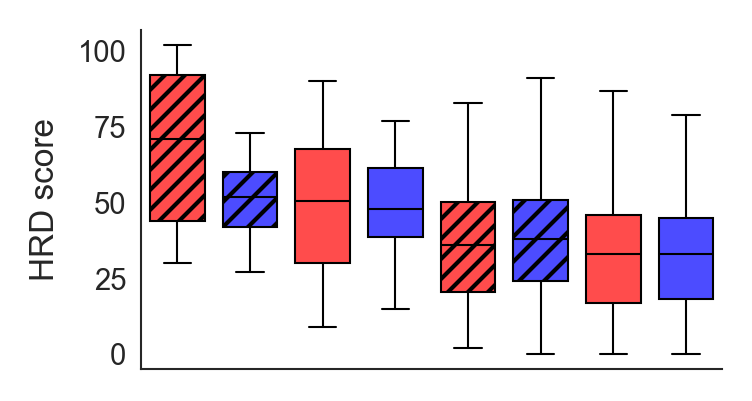

In [38]:
fig = plt.figure(figsize=(2.5,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_ylabel("HRD score",fontsize=MEDIUM_SIZE)
ax.set_xticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)

_,p1=stats.mannwhitneyu(c1,c2)
_,p2=stats.mannwhitneyu(c3,c4)
_,p3=stats.mannwhitneyu(c5,c6)
_,p4=stats.mannwhitneyu(c7,c8)
_,p12=stats.mannwhitneyu( np.concatenate([c1,c2]),   np.concatenate([c3,c4])  )
_,p34=stats.mannwhitneyu( np.concatenate([c5,c6]),   np.concatenate([c7,c8])  )
_,p1_234=stats.mannwhitneyu( np.concatenate([c1]),   np.concatenate([c2,c3,c4])  )
for p in [p1,p2,p3,p4,p12,p34,p1_234]:
    print( "p = {:.2e}".format(p) )
plt.savefig(path_to_results+"SupplementaryFigure14_1.png",bbox_inches="tight")

In [39]:
# LOH vs nonLOH per alteration
value="MSK_Sig3_ratio"
plt_df2=plt_df.dropna(subset=[value])
c1=plt_df2.loc[(plt_df2["HA_cases"]==1) & (plt_df2["SEX"]=="Female") & (plt_df2["TP53_mut"]==1), value].values
c2=plt_df2.loc[(plt_df2["HA_cases"]==1) & (plt_df2["SEX"]=="Male") & (plt_df2["TP53_mut"]==1), value].values
c3=plt_df2.loc[(plt_df2["HA_cases"]==1) & (plt_df2["SEX"]=="Female") & (plt_df2["TP53_mut"]==0), value].values
c4=plt_df2.loc[(plt_df2["HA_cases"]==1) & (plt_df2["SEX"]=="Male") & (plt_df2["TP53_mut"]==0), value].values
c5=plt_df2.loc[(plt_df2["HA_cases"]==0) & (plt_df2["SEX"]=="Female") & (plt_df2["TP53_mut"]==1), value].values
c6=plt_df2.loc[(plt_df2["HA_cases"]==0) & (plt_df2["SEX"]=="Male") & (plt_df2["TP53_mut"]==1), value].values
c7=plt_df2.loc[(plt_df2["HA_cases"]==0) & (plt_df2["SEX"]=="Female") & (plt_df2["TP53_mut"]==0), value].values
c8=plt_df2.loc[(plt_df2["HA_cases"]==0) & (plt_df2["SEX"]=="Male") & (plt_df2["TP53_mut"]==0), value].values

data_comp=[c1,c2,c3,c4,c5,c6,c7,c8]

p = 3.51e-01
p = 4.10e-01
p = 9.69e-01
p = 5.03e-02
p = 8.66e-01
p = 2.27e-01
p = 3.75e-01


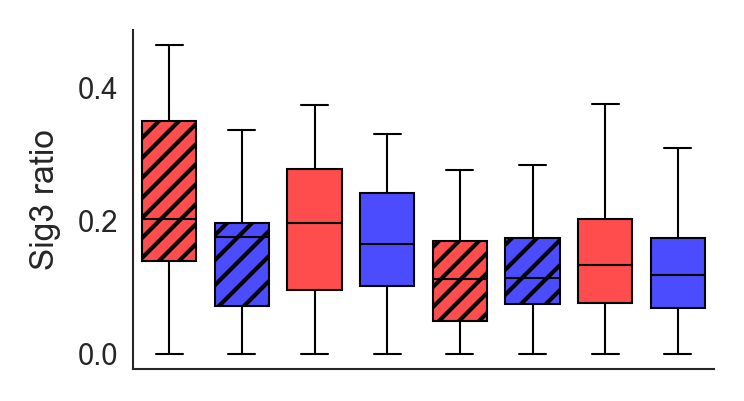

In [40]:
fig = plt.figure(figsize=(2.5,1.5))
ax = fig.add_subplot(1,1,1)
bp=ax.boxplot(data_comp, showfliers=False,patch_artist=True, 
              widths=0.75)
colors=[(1,0,0,0.7),(0,0,1,0.7)]*4
hatches=["/////","////","",""]*2
# box face color
for b, c,h in zip(bp['boxes'], colors, hatches):
    b.set(linewidth=0.5) 
    b.set(hatch=h) 
    b.set(facecolor=c)
    b.set(edgecolor="k")
# median line
for b, c in zip(bp['medians'], colors):
    b.set(color="k",linewidth=0.5)
for b, c in zip(bp['whiskers'], colors*2):
    b.set(linewidth=0.5)
# caps
for b, c in zip(bp['caps'], colors*2):
    b.set( linewidth=0.5)

ax.set_xlabel('')
ax.set_ylabel("Sig3 ratio",fontsize=MEDIUM_SIZE)
ax.set_xticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right' ].set_visible(False)

_,p1=stats.mannwhitneyu(c1,c2)
_,p2=stats.mannwhitneyu(c3,c4)
_,p3=stats.mannwhitneyu(c5,c6)
_,p4=stats.mannwhitneyu(c7,c8)
_,p12=stats.mannwhitneyu( np.concatenate([c1,c2]),   np.concatenate([c3,c4])  )
_,p34=stats.mannwhitneyu( np.concatenate([c5,c6]),   np.concatenate([c7,c8])  )
_,p1_234=stats.mannwhitneyu( np.concatenate([c1]),   np.concatenate([c2,c3,c4])  )
for p in [p1,p2,p3,p4,p12,p34,p1_234]:
    print( "p = {:.2e}".format(p) )
plt.savefig(path_to_results+"SupplementaryFigure14_2.png",bbox_inches="tight")

# Supplementary Figure 14BCDF

In [41]:
plt_df=plt_df0.copy()

In [42]:
gender_tp53=[]
for idx in plt_df.index:
    tp53=plt_df.loc[idx,"TP53_mut"]
    gender=plt_df.loc[idx,"SEX"]
    if tp53==1:
        if gender=="Male":
            gender_tp53.append("Male_TP53m")
        elif gender=="Female":
            gender_tp53.append("Female_TP53m")
        else:
            gender_tp53.append("unknown")
    elif tp53==0:
        if gender=="Male":
            gender_tp53.append("Male_TP53wt")
        elif gender=="Female":
            gender_tp53.append("Female_TP53wt")
        else:
            gender_tp53.append("unknown")
    else:
        gender_tp53.append("unknown")

plt_df["gender_TP53"]=gender_tp53

In [43]:
from sklearn.metrics import roc_curve,roc_auc_score

def roc_auc_ci(y_true, y_score, positive=1):
    AUC = roc_auc_score(y_true, y_score)
    N1 = sum(y_true == positive)
    N2 = sum(y_true != positive)
    Q1 = AUC / (2 - AUC)
    Q2 = 2*AUC**2 / (1 + AUC)
    SE_AUC =((AUC*(1 - AUC) + (N1 - 1)*(Q1 - AUC**2) + (N2 - 1)*(Q2 - AUC**2)) / (N1*N2))**0.5
    lower = AUC - 1.96*SE_AUC
    upper = AUC + 1.96*SE_AUC
    if lower < 0:
        lower = 0
    if upper > 1:
        upper = 1
    return (lower, upper)

39
0.725
0.652 0.798


Text(0, 0.5, 'True positive rate')

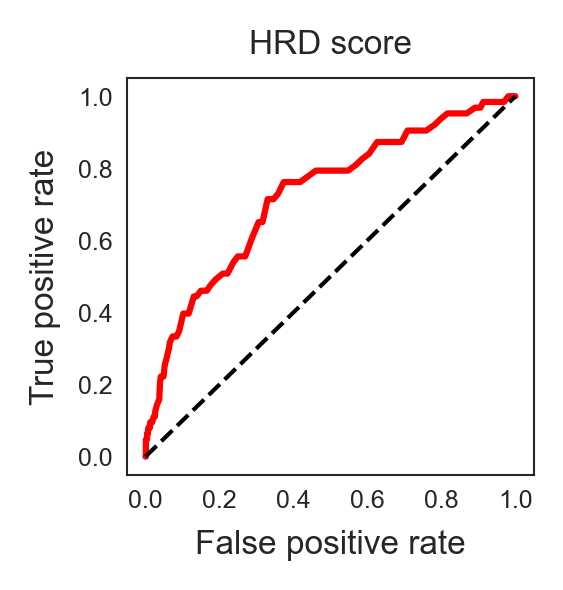

In [44]:
fig=plt.figure(figsize=(1.75,1.75))
ax=fig.add_subplot(111)

plt_df2=plt_df.copy()
plt_df2=plt_df2.dropna(subset=["HA_cases","HRD_score"])
y_true=np.array(plt_df2["HA_cases"])
y_score=np.array(plt_df2["HRD_score"])
#w=[0.1 if x==0 else 0.9 for x in y_true ]
fpr, tpr, thresholds = roc_curve(y_true, y_score)   
auc = np.round( roc_auc_score(y_true, y_score),3)
ci1,ci2 = np.round( roc_auc_ci(y_true, y_score),3 )
ax.plot(fpr,tpr,c="r",ls="-")
optimal_idx = np.argmax(tpr - fpr)
cutoff_u1= thresholds[optimal_idx]
print(cutoff_u1)
print(auc)
print( ci1,ci2) 
    
ax.plot([0,1],[0,1],c="k",ls="--",lw=1)
ax.set_xticks( [0,0.2,0.4,0.6,0.8,1] )
ax.tick_params(labelsize=6)
ax.set_title("HRD score",fontsize=MEDIUM_SIZE)
ax.legend([])

ax.set_xlabel("False positive rate",fontsize=MEDIUM_SIZE)
ax.set_ylabel("True positive rate",fontsize=MEDIUM_SIZE)

0.239180084
0.617
0.541 0.693


Text(0, 0.5, 'True positive rate')

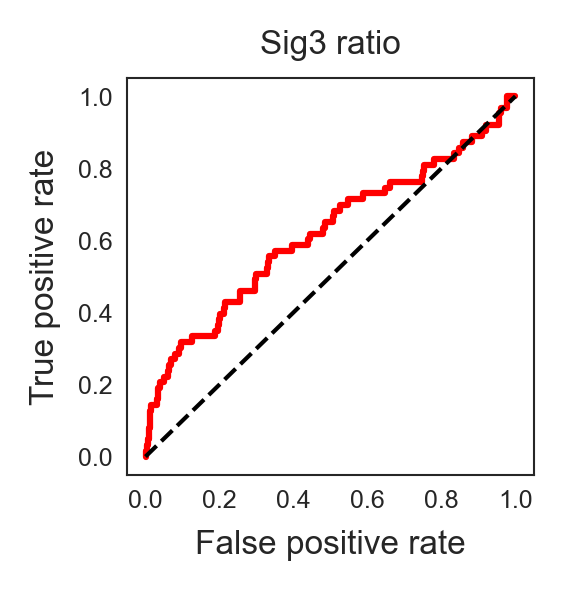

In [45]:
fig=plt.figure(figsize=(1.75,1.75))
ax=fig.add_subplot(111)

plt_df2=plt_df
plt_df2=plt_df2.dropna(subset=["HA_cases","MSK_Sig3_ratio"])
y_true=np.array(plt_df2["HA_cases"])
y_score=np.array(plt_df2["MSK_Sig3_ratio"])
#w=[0.1 if x==0 else 0.9 for x in y_true ]
fpr, tpr, thresholds = roc_curve(y_true, y_score)   
auc = np.round( roc_auc_score(y_true, y_score),3)
ci1,ci2 = np.round( roc_auc_ci(y_true, y_score),3 )
ax.plot(fpr,tpr,c="r",ls="-")
optimal_idx = np.argmax(tpr - fpr)
cutoff_u2=thresholds[optimal_idx]
print( cutoff_u2)
print(auc)
print( ci1,ci2) 

ax.plot([0,1],[0,1],c="k",ls="--",lw=1)
ax.set_xticks( [0,0.2,0.4,0.6,0.8,1] )
ax.tick_params(labelsize=6)
ax.set_title("Sig3 ratio",fontsize=MEDIUM_SIZE)
ax.legend([])
ax.set_xlabel("False positive rate",fontsize=MEDIUM_SIZE)
ax.set_ylabel("True positive rate",fontsize=MEDIUM_SIZE)

rS= 0.204 p= 1.06e-10


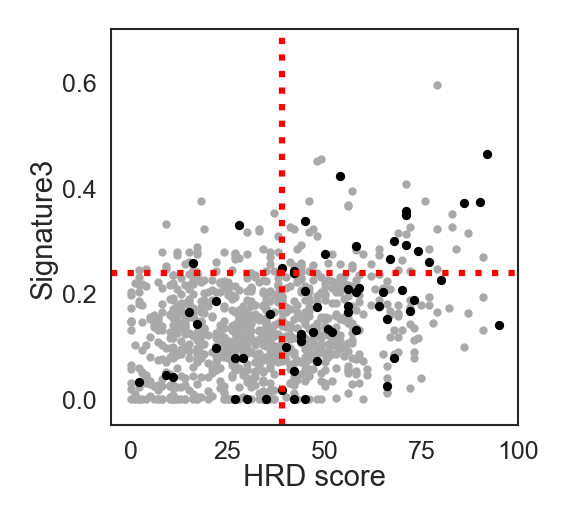

In [46]:
val1="HRD_score"
val2="MSK_Sig3_ratio"
fig=plt.figure(figsize=(1.75,1.75))
ax=fig.add_subplot(111)
plt_df2=plt_df[ plt_df["HA_cases"]==0]
x=plt_df2[val1]
y=plt_df2[val2]
ax.scatter(x,y,c="darkgrey",s=1)

plt_df2=plt_df[plt_df["HA_cases"]==1]
x=plt_df2[val1]
y=plt_df2[val2]
ax.scatter(x,y,c="black",s=1.5)

ax.axvline(x=cutoff_u1,ls="dotted",c="r",lw=1.5)
ax.axhline(y=cutoff_u2,ls="dotted",c="r",lw=1.5)

ax.set_xlim(-5,100)
ax.set_ylim(-0.05,0.7)
ax.set_xlabel("HRD score",fontsize= SMALL_SIZE,labelpad=0)
ax.set_ylabel("Signature3",fontsize=SMALL_SIZE,labelpad=1)
ax.tick_params(labelsize=6)

x=plt_df[val1]
y=plt_df[val2]
r,p=stats.spearmanr(x,y,nan_policy="omit")
rS="{:.3f}".format(r)
pval="{:.2e}".format(p)
print("rS=", rS, "p=", pval)

plt.savefig(path_to_results+"SupplementaryFigure14_D.png",bbox_inches="tight")

[58 39 56 42]
[[0.172 0.667]
 [0.494 0.857]
 [0.12  0.5  ]
 [0.304 0.737]]
[0.806 0.69  0.702 0.712]
[[0.627 0.984]
 [0.465 0.915]
 [0.575 0.829]
 [0.578 0.847]]


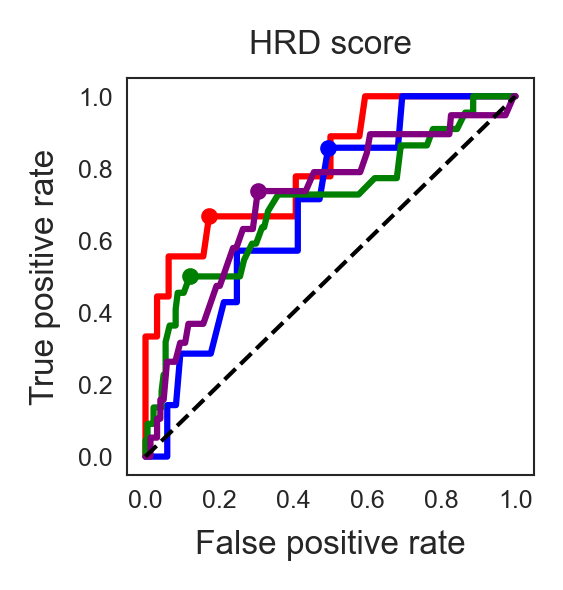

In [47]:
groups=['Female_TP53m', 'Male_TP53m', 'Female_TP53wt', 'Male_TP53wt']
labels=['Female TP53m', 'Male TP53m', 'Female TP53wt', 'Male TP53wt']
colors=["red","blue","green","purple"]
cutoffs,optimals,aucs,cis=[],[],[],[]

fig=plt.figure(figsize=(1.75,1.75))
ax=fig.add_subplot(111)
for i,group in enumerate(groups) :
    plt_df2=plt_df[ plt_df["gender_TP53"]==group]
    plt_df2=plt_df2.dropna(subset=["HA_cases","HRD_score"])
    y_true=np.array(plt_df2["HA_cases"])
    y_score=np.array(plt_df2["HRD_score"])
    w=[0.1 if x==0 else 0.9 for x in y_true ]
    fpr, tpr, thresholds = roc_curve(y_true, y_score,sample_weight=w )   
    auc = np.round( roc_auc_score(y_true, y_score),3)
    ci1,ci2 = np.round( roc_auc_ci(y_true, y_score),3 )
    ax.plot(fpr,tpr,c=colors[i],ls="-",label=labels[i])
    optimal_idx = np.argmax(tpr - fpr)
    optimals.append( [fpr[optimal_idx],tpr[optimal_idx]] )
    cutoffs.append( thresholds[optimal_idx])
    aucs.append(auc)
    cis.append( (ci1,ci2) )
    
ax.set_xlabel("False positive rate",fontsize=MEDIUM_SIZE)
ax.set_ylabel("True positive rate",fontsize=MEDIUM_SIZE)
ax.legend(bbox_to_anchor=(1, 1), fontsize=MEDIUM_SIZE,labels=labels)

for i,point in enumerate(optimals):
    ax.plot( point[0],point[1],c=colors[i],marker="o",markersize=3)
ax.plot([0,1],[0,1],c="k",ls="--",lw=1)
ax.set_xticks( [0,0.2,0.4,0.6,0.8,1] )
ax.tick_params(labelsize=6)
ax.set_title("HRD score",fontsize=MEDIUM_SIZE)
ax.legend([])
plt.savefig(path_to_results+"SupplementaryFigure14_C1.png",bbox_inches="tight")

print(np.round(cutoffs,3))
print(np.round(optimals,3))
print(np.round(aucs,3))
print(np.round(cis,3))

[0.119 0.176 0.249 0.165]
[[0.483 0.889]
 [0.229 0.571]
 [0.115 0.409]
 [0.279 0.579]]
[0.724 0.599 0.624 0.642]
[[0.526 0.922]
 [0.369 0.829]
 [0.493 0.755]
 [0.503 0.781]]


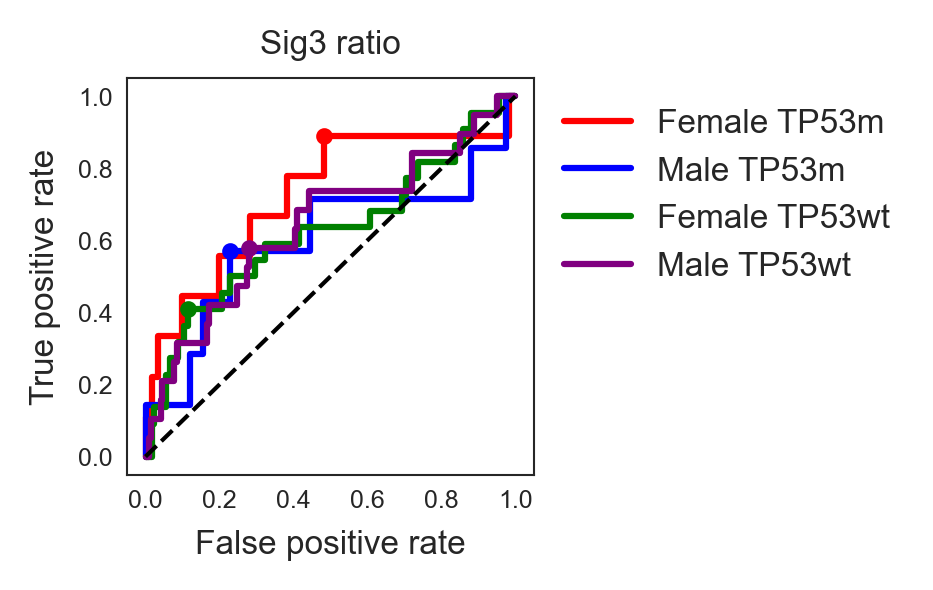

In [48]:
groups=['Female_TP53m', 'Male_TP53m', 'Female_TP53wt', 'Male_TP53wt']
labels=['Female TP53m', 'Male TP53m', 'Female TP53wt', 'Male TP53wt']
colors=["red","blue","green","purple"]
cutoffs2,optimals2,aucs2,cis2=[],[],[],[]

fig=plt.figure(figsize=(1.75,1.75))
ax=fig.add_subplot(111)
for i,group in enumerate(groups) :
    plt_df2=plt_df[ plt_df["gender_TP53"]==group]
    plt_df2=plt_df2.dropna(subset=["HA_cases","MSK_Sig3_ratio"])
    y_true=np.array(plt_df2["HA_cases"])
    y_score=np.array(plt_df2["MSK_Sig3_ratio"])
    w=[0.1 if x==0 else 0.9 for x in y_true ]
    fpr, tpr, thresholds = roc_curve(y_true, y_score,sample_weight=w )   
    auc = np.round( roc_auc_score(y_true, y_score),3)
    ci1,ci2 = np.round( roc_auc_ci(y_true, y_score),3 )
    ax.plot(fpr,tpr,c=colors[i],ls="-",label=labels[i])
    optimal_idx = np.argmax(tpr - fpr)
    optimals2.append( [fpr[optimal_idx],tpr[optimal_idx]] )
    cutoffs2.append( thresholds[optimal_idx])
    aucs2.append(auc)
    cis2.append( (ci1,ci2) )
    
ax.set_xlabel("False positive rate",fontsize=MEDIUM_SIZE)
ax.set_ylabel("True positive rate",fontsize=MEDIUM_SIZE)
ax.legend(bbox_to_anchor=(1, 1), fontsize=MEDIUM_SIZE,labels=labels)

for i,point in enumerate(optimals2):
    ax.plot( point[0],point[1],c=colors[i],marker="o",markersize=3)
ax.plot([0,1],[0,1],c="k",ls="--",lw=1)
ax.set_xticks( [0,0.2,0.4,0.6,0.8,1] )
ax.tick_params(labelsize=6)
ax.set_title("Sig3 ratio",fontsize=MEDIUM_SIZE)
plt.savefig(path_to_results+"SupplementaryFigure14_C2.png",bbox_inches="tight")

print(np.round(cutoffs2,3))
print(np.round(optimals2,3))
print(np.round(aucs2,3))
print(np.round(cis2,3))

Female_TP53m rS= 0.613 p= 2.18e-08
Male_TP53m rS= 0.298 p= 4.31e-03
Female_TP53wt rS= 0.344 p= 4.49e-07
Male_TP53wt rS= 0.038 p= 5.60e-01


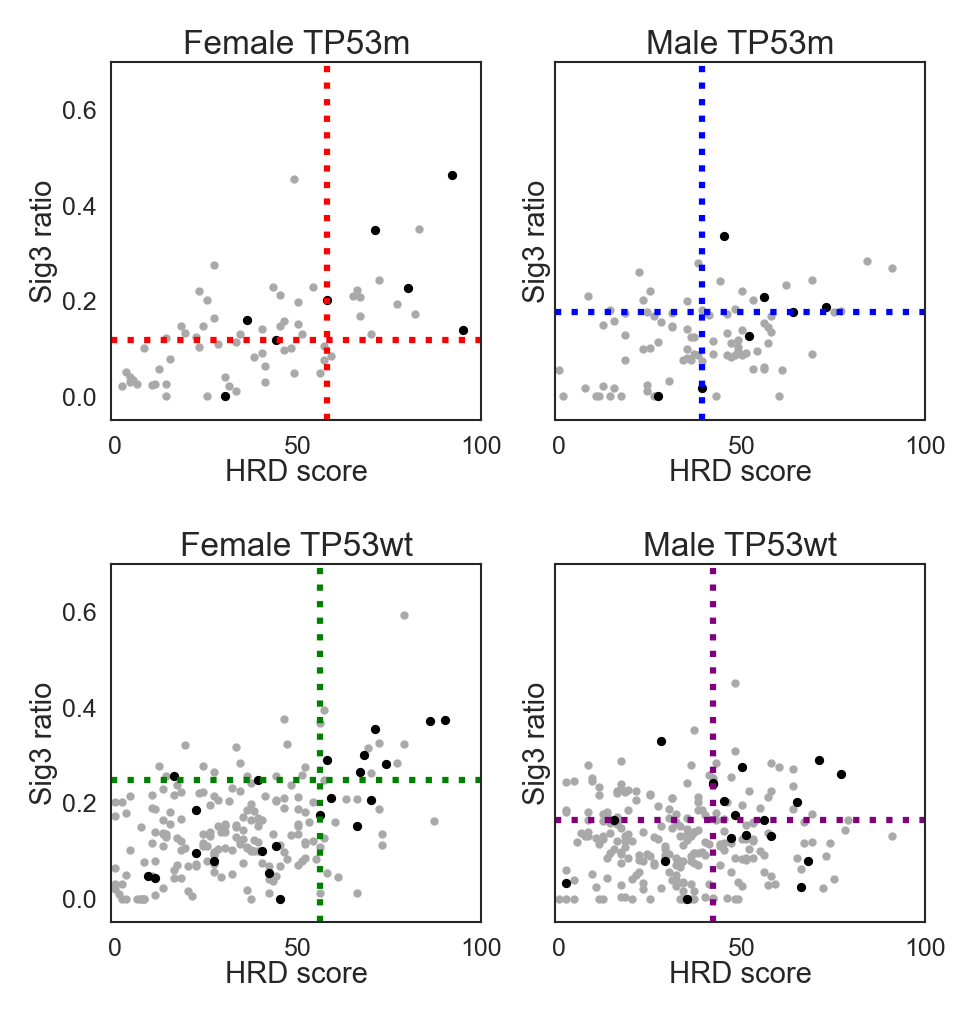

In [49]:
groups=['Female_TP53m', 'Male_TP53m', 'Female_TP53wt', 'Male_TP53wt']
labels=['Female TP53m', 'Male TP53m', 'Female TP53wt', 'Male TP53wt']

val1="HRD_score"
val2="MSK_Sig3_ratio"
fig=plt.figure(figsize=(3.5,3.8))
rSs,pvals=[],[]
for i,group in enumerate(groups) :
    ax=fig.add_subplot(2,2,i+1)
    plt_df2=plt_df[ (plt_df["gender_TP53"]==group)&(plt_df["HA_cases"]==0)]
    x=plt_df2[val1]
    y=plt_df2[val2]
    ax.scatter(x,y,c="darkgrey",s=1)
    
    plt_df2=plt_df[ (plt_df["gender_TP53"]==group)&(plt_df["HA_cases"]==1)]
    x=plt_df2[val1]
    y=plt_df2[val2]
    ax.scatter(x,y,c="black",s=1.5)
    
    ax.axvline(x=cutoffs[i],ls="dotted",c=colors[i],lw=1.5)
    ax.axhline(y=cutoffs2[i],ls="dotted",c=colors[i],lw=1.5)
    
    ax.set_xlim(-1,100)
    ax.set_ylim(-0.05,0.7)
    ax.set_title(labels[i],fontsize=8,y=1.0, pad=2)
    ax.set_xlabel("HRD score",fontsize= SMALL_SIZE,labelpad=0)
    ax.set_ylabel("Sig3 ratio",fontsize=SMALL_SIZE,labelpad=1)
    
    if i in [1,3]:
        #ax.set_ylabel("")
        ax.set_yticks([])
        
    ax.tick_params(labelsize=6)
    
    plt_df2=plt_df[ (plt_df["gender_TP53"]==group)]
    x=plt_df2[val1]
    y=plt_df2[val2]
    r,p=stats.spearmanr(x,y,nan_policy="omit")
    rS="{:.3f}".format(r)
    pval="{:.2e}".format(p)
    print(group, "rS=", rS, "p=", pval)
    rSs.append(rS)
    pvals.append(pval)
    
plt.subplots_adjust(hspace=0.4)
plt.savefig(path_to_results+"SupplementaryFigure14_B.png",bbox_inches="tight")

In [50]:
df_w=pd.DataFrame({"coef":rSs,"p-value":pvals,"cutoff1":cutoffs,"AUC1":aucs,"95%CI1":cis, "cutoff2":cutoffs2,"AUC2":aucs2,"95%CI2":cis2,\
             },index=groups)
df_w.to_csv(path_to_results+"SupplementaryFigure14_table.tsv",sep="\t")
print(df_w)

                coef   p-value  cutoff1   AUC1          95%CI1   cutoff2  \
Female_TP53m   0.613  2.18e-08       58  0.806  (0.627, 0.984)  0.118851   
Male_TP53m     0.298  4.31e-03       39  0.690  (0.465, 0.915)  0.175539   
Female_TP53wt  0.344  4.49e-07       56  0.702  (0.575, 0.829)  0.248618   
Male_TP53wt    0.038  5.60e-01       42  0.712  (0.578, 0.847)  0.164776   

                AUC2          95%CI2  
Female_TP53m   0.724  (0.526, 0.922)  
Male_TP53m     0.599  (0.369, 0.829)  
Female_TP53wt  0.624  (0.493, 0.755)  
Male_TP53wt    0.642  (0.503, 0.781)  


# Supplementary Figure 14E

In [51]:
plt_df=plt_df0.copy()

In [52]:
from collections import Counter
Counter( plt_df["SEX"] )

Counter({'Male': 335, 'Female': 279, nan: 54, 'Na': 337})

In [53]:
gender_tp53=[]
for idx in plt_df.index:
    tp53=plt_df.loc[idx,"TP53_mut"]
    gender=plt_df.loc[idx,"SEX"]
    if tp53==1:
        if gender=="Male":
            gender_tp53.append("Male_TP53m")
        elif gender=="Female":
            gender_tp53.append("Female_TP53m")
        else:
            gender_tp53.append("unknown")
    elif tp53==0:
        if gender=="Male":
            gender_tp53.append("Male_TP53wt")
        elif gender=="Female":
            gender_tp53.append("Female_TP53wt")
        else:
            gender_tp53.append("unknown")
    else:
        gender_tp53.append("unknown")

plt_df["gender_TP53"]=gender_tp53

In [54]:
groups=['Female_TP53m', 'Male_TP53m', 'Female_TP53wt', 'Male_TP53wt',"unknown"]
gs_cases=[]
    
for idx in plt_df.index:
    for i,group in enumerate(groups):
        if plt_df.loc[idx,"gender_TP53"]==group:
            if group != "unknown":
                hrd_co=cutoffs[i]
                sig_co=cutoffs2[i]
            else:
                hrd_co=cutoff_u1
                sig_co=cutoff_u2
            gs_case=(  (plt_df.loc[idx,"HRD_score"]>=hrd_co) & (plt_df.loc[idx,"MSK_Sig3_ratio"]>=sig_co )).astype(float)
            gs_cases.append(gs_case)
            
plt_df["GS_cases"]=gs_cases

In [55]:
gs_ha=[]
for idx in plt_df.index:
    if (plt_df.loc[idx,"HA_cases"]==1)&(plt_df.loc[idx,"GS_cases"]==1):
        gs_ha.append("GS&HA")
    elif (plt_df.loc[idx,"HA_cases"]==1)&(plt_df.loc[idx,"GS_cases"]==0):
        gs_ha.append("HA")
    elif (plt_df.loc[idx,"HA_cases"]==0)&(plt_df.loc[idx,"GS_cases"]==1):
        gs_ha.append("GS")
    elif (plt_df.loc[idx,"HA_cases"]==0)&(plt_df.loc[idx,"GS_cases"]==0):
        gs_ha.append("nonHRD")
    else:
        gs_ha.append(None)

plt_df["GS_HA"]=gs_ha

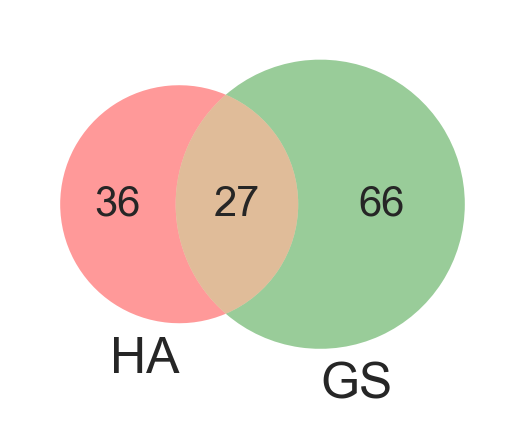

In [57]:
from matplotlib_venn import venn2

plt.figure(figsize=(2,3))
s1=set( plt_df[plt_df["HA_cases"]==1].index)
s2=set(plt_df[plt_df["GS_cases"]==1].index)
venn2(subsets=[s1,s2],set_labels=["HA","GS"])

plt.savefig( path_to_results+"SupplementaryFigure14_E.png",bbox_inches="tight")

In [58]:
plt_df.shape

(1005, 108)

# Figure 6

In [59]:
gdsc2=pd.read_csv(path_to_data+"Data_from_GDSC2.tsv",sep="\t")
gdsc2

,Drug name,Drug Id,Cell line name,Cosmic sample Id,TCGA classification,Tissue,Tissue sub-type,LN_IC50,AUC,Max conc,RMSE,Z score,Dataset version,stripped_index,CCLE_Name
0,Camptothecin,1003,MC-CAR,683665,MM,blood,haematopoietic_neoplasm_other,-1.746082,0.948137,0.1,0.165097,0.178131,GDSC2,MCCAR,MCCAR_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
1,Camptothecin,1003,PFSK-1,683667,MB,nervous_system,medulloblastoma,-2.006249,0.912409,0.1,0.086801,0.051354,GDSC2,PFSK1,PFSK1_CENTRAL_NERVOUS_SYSTEM
2,Camptothecin,1003,A673,684052,UNCLASSIFIED,soft_tissue,rhabdomyosarcoma,-4.962337,0.607172,0.1,0.083362,-1.389121,GDSC2,A673,A673_BONE
3,Camptothecin,1003,ES5,684057,UNCLASSIFIED,bone,ewings_sarcoma,-2.509709,0.874902,0.1,0.130203,-0.193977,GDSC2,ES5,ES5_BONE
4,Camptothecin,1003,ES7,684059,UNCLASSIFIED,bone,ewings_sarcoma,-5.239445,0.569572,0.1,0.106807,-1.524153,GDSC2,ES7,ES7_BONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135058,JQ1,2172,EFM-192A,1290798,BRCA,breast,breast,3.576583,0.931696,10.0,0.113045,0.408803,GDSC2,EFM192A,EFM192A_BREAST
135059,JQ1,2172,HCC1428,1290905,BRCA,breast,breast,1.402466,0.738310,10.0,0.076166,-0.842127,GDSC2,HCC1428,HCC1428_BREAST
135060,JQ1,2172,HDQ-P1,1290922,BRCA,breast,breast,2.762460,0.890749,10.0,0.118497,-0.059622,GDSC2,HDQP1,HDQP1_BREAST
135061,JQ1,2172,JIMT-1,1298157,BRCA,breast,breast,3.442930,0.942634,10.0,0.090167,0.331903,GDSC2,JIMT1,JIMT1_BREAST


In [60]:
drug_info=pd.read_csv(path_to_data+"Supplementary_table5.tsv",sep="\t",skiprows=1)
drug_info=drug_info.sort_values("drug_id")
dupid=drug_info[drug_info["drug_name"].duplicated()].index
drug_info.loc[dupid,"drug_name"]=[x+"_2" for x in drug_info.loc[dupid,"drug_name"]]

In [61]:
dict_dname_did={k:v for k,v in zip( drug_info["drug_name"],drug_info["drug_id"] )}

In [62]:
dict_drug_p_means={}
dict_drug_p_means={}
drug_names=sorted( drug_info[ drug_info["category2"]=="DNA damaging"]["drug_name"] )
N=len(drug_names)

value="LN_IC50_z"

for i,drug_name in enumerate(drug_names):
    dict_drug_p_means[drug_name]={}
    dict_drug_p_means[drug_name]={}
    drug_id=dict_dname_did[drug_name]
    gdsc_selected=gdsc2[gdsc2["Drug Id"]==drug_id][["LN_IC50","CCLE_Name"]]
    gdsc_selected["LN_IC50_z"]=stats.zscore(gdsc_selected["LN_IC50"])
    plt_df2=pd.merge( plt_df,gdsc_selected,left_index=True,right_on="CCLE_Name")
    
    tmp_df=plt_df2.copy()
    tmp_df=tmp_df.dropna(subset=[value])
    
    order=["GS&HA","GS","HA","nonHRD"]
    for group in order:
        values= tmp_df[tmp_df["GS_HA"]==group][value].values
        dict_drug_p_means[drug_name][group]=np.nanmean(values)
    
    a=tmp_df[tmp_df["GS_HA"]=="GS&HA"][value].values
    b=tmp_df[tmp_df["GS_HA"]=="GS"][value].values
    c=tmp_df[tmp_df["GS_HA"]=="HA"][value].values
    d=tmp_df[tmp_df["GS_HA"]=="nonHRD"][value].values
    e=np.concatenate( [a,b,c] )
    _,p=stats.mannwhitneyu(e,d)
    diff_mean=np.nanmean(e)-np.nanmean(d)
    dict_drug_p_means[drug_name]["m_diff"]=diff_mean
    dict_drug_p_means[drug_name]["p-value"]=p

In [63]:
Counter(plt_df2["GS_HA"])

Counter({'GS': 49, 'nonHRD': 638, 'GS&HA': 21, 'HA': 33})

In [64]:
sns_df=pd.DataFrame.from_dict(dict_drug_p_means).T
sns_df["-log10 pvalue"]=-np.log10( sns_df["p-value"])
sns_df.sort_values("-log10 pvalue",ascending=False,inplace=True)
sns_df

,GS&HA,GS,HA,nonHRD,m_diff,p-value,-log10 pvalue
Cytarabine,0.532680,0.537428,0.467919,-0.081882,0.596072,3.188864e-09,8.496364
Camptothecin,0.301935,0.433792,0.651741,-0.073204,0.545511,6.318985e-08,7.199353
Irinotecan,0.306107,0.387713,0.607598,-0.066113,0.504862,2.569334e-07,6.590179
Epirubicin,0.607220,0.504359,0.346737,-0.073764,0.548594,2.708063e-07,6.567341
Temozolomide,0.443978,0.463927,0.471523,-0.072675,0.534793,3.987564e-07,6.399292
Dactinomycin_2,0.353830,0.369363,0.701848,-0.076555,0.549275,3.995875e-07,6.398388
Gemcitabine,0.284942,0.475821,0.612978,-0.073755,0.551418,6.632038e-07,6.178353
Mitoxantrone,0.343748,0.498146,0.345309,-0.066991,0.487593,7.600171e-06,5.119177
Cisplatin,0.434115,0.351243,0.443131,-0.064517,0.462003,1.050288e-05,4.978692
Oxaliplatin,0.448017,0.377165,0.317459,-0.059695,0.433014,4.015756e-05,4.396233


In [65]:
for i in sns_df.index:
    print(i)

Cytarabine
Camptothecin
Irinotecan
Epirubicin
Temozolomide
Dactinomycin_2
Gemcitabine
Mitoxantrone
Cisplatin
Oxaliplatin
YK-4-279
Topotecan
Teniposide
Dactinomycin
Carmustine
Leflunomide
5-Fluorouracil
Oxaliplatin_2
Nelarabine
Cyclophosphamide
Fludarabine


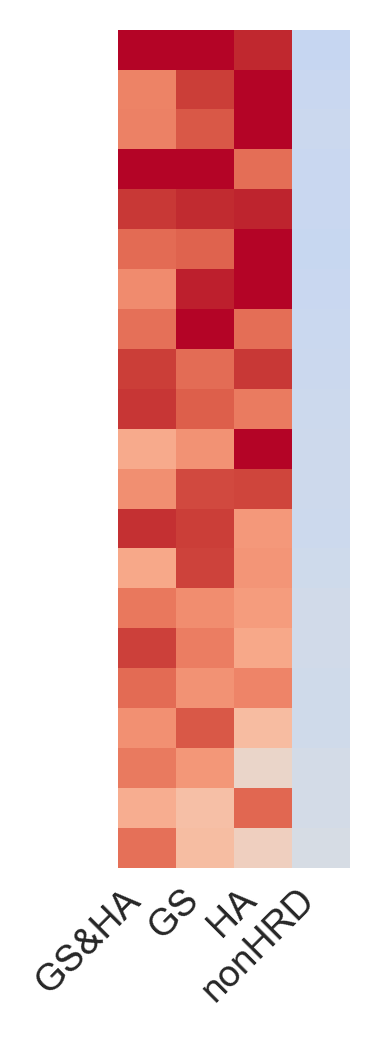

In [66]:
fig=plt.figure(figsize=(1,3.7))
ax=fig.add_subplot(111)

sns.heatmap( sns_df[order],vmin=-0.5,vmax=0.5,cmap="coolwarm",cbar=False,ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=9)
ax.set_xticklabels(order,rotation=45, ha='right')
ax.set_yticklabels([])
plt.savefig( path_to_results+"Figure6A_1.png",bbox_inches="tight")

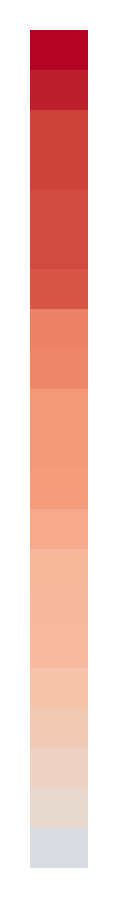

In [67]:
fig=plt.figure(figsize=(0.25,3.7))
ax=fig.add_subplot(111)
center=-np.log10(0.05)
sns.heatmap( sns_df[["-log10 pvalue"]],vmin=0,vmax=7.5,center=center,cmap="coolwarm",cbar=False)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=8)
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.savefig( path_to_results+"Figure6A_2.png",bbox_inches="tight")

In [68]:
all_drugs=list(drug_info["drug_name"])

In [69]:
dict_drug_pvalues={}
value="LN_IC50_z"
for i,drug_name in enumerate(all_drugs):
        dict_drug_pvalues[drug_name]={}
        drug_id=dict_dname_did[drug_name]
        gdsc_selected=gdsc2[gdsc2["Drug Id"]==drug_id][["LN_IC50","CCLE_Name"]]
        gdsc_selected["LN_IC50_z"]=stats.zscore(gdsc_selected["LN_IC50"])
        plt_df2=pd.merge( plt_df,gdsc_selected,left_index=True,right_on="CCLE_Name")
        a=plt_df2[plt_df2["GS_HA"].isin(["HA","GS","GS&HA"])] [value].values#"GS&HA","GS",
        b=plt_df2[plt_df2["GS_HA"]=="nonHRD"] [value].values
        m_diff=np.nanmean(a)-np.nanmean(b)
        _,p=stats.ttest_ind(a,b)
        dict_drug_pvalues[drug_name]["m_diff"]=m_diff
        dict_drug_pvalues[drug_name]["p-value"]=p

In [70]:
df_drug_pvalues=pd.DataFrame.from_dict(dict_drug_pvalues).T
df_drug_pvalues["-log10_pvalue"]=-np.log10(df_drug_pvalues["p-value"])
df_drug_pvalues["p<0.05"]=(df_drug_pvalues["p-value"]<0.05).astype(float)
df_drug_pvalues

,m_diff,p-value,-log10_pvalue,p<0.05
Camptothecin,0.545511,1.177972e-07,6.928865,1.0
Vinblastine,0.409911,1.054830e-04,3.976818,1.0
Cisplatin,0.462003,1.037043e-05,4.984203,1.0
Cytarabine,0.596072,1.472455e-08,7.831958,1.0
Docetaxel,0.345425,9.951843e-04,3.002096,1.0
...,...,...,...,...
VE821,0.412427,9.249050e-05,4.033903,1.0
AZD6482,0.335361,2.614247e-01,0.582653,0.0
AT13148,0.289694,6.330639e-03,2.198552,1.0
BMS-754807,-0.096960,8.745155e-01,0.058232,0.0


In [71]:
from statsmodels.stats import multitest
res=multitest.multipletests(df_drug_pvalues["p-value"],alpha=0.01, method="fdr_bh")
df_drug_pvalues["fdr"]=res[1]
df_drug_pvalues["FDR<0.01"]=(res[0]).astype(float)

In [72]:
annotation=[]
for idx in df_drug_pvalues.index:
        cat=drug_info[drug_info["drug_name"]==idx]["category2"].values[0]
        annotation.append(cat)
df_drug_pvalues["annotation"]=annotation

In [73]:
df_drug_pvalues

,m_diff,p-value,-log10_pvalue,p<0.05,fdr,FDR<0.01,annotation
Camptothecin,0.545511,1.177972e-07,6.928865,1.0,0.000007,1.0,DNA damaging
Vinblastine,0.409911,1.054830e-04,3.976818,1.0,0.000615,1.0,Microtubule inhibitor
Cisplatin,0.462003,1.037043e-05,4.984203,1.0,0.000127,1.0,DNA damaging
Cytarabine,0.596072,1.472455e-08,7.831958,1.0,0.000003,1.0,DNA damaging
Docetaxel,0.345425,9.951843e-04,3.002096,1.0,0.003178,1.0,Microtubule inhibitor
...,...,...,...,...,...,...,...
VE821,0.412427,9.249050e-05,4.033903,1.0,0.000615,1.0,Genome integrity
AZD6482,0.335361,2.614247e-01,0.582653,0.0,0.299203,0.0,PI3K/MTOR signaling
AT13148,0.289694,6.330639e-03,2.198552,1.0,0.013194,0.0,PI3K/MTOR signaling
BMS-754807,-0.096960,8.745155e-01,0.058232,0.0,0.892547,0.0,IGF1R signaling


In [74]:
df_by_cat=df_drug_pvalues.groupby("annotation").mean().sort_values("-log10_pvalue",ascending=False)
df_by_cat

,m_diff,p-value,-log10_pvalue,p<0.05,fdr,FDR<0.01
annotation,,,,,,
DNA damaging,0.427099,0.005562,4.474140,0.952381,0.008808,0.857143
PARP_inhibiotor,0.439301,0.000065,4.417197,1.000000,0.000448,1.000000
ERK MAPK signaling,0.408078,0.002009,4.041737,1.000000,0.004123,0.833333
p53 pathway,0.388392,0.001218,3.676452,1.000000,0.003306,1.000000
Chromatin related,0.347506,0.067031,2.784556,0.866667,0.071413,0.800000
Genome integrity,0.362322,0.068946,2.681172,0.750000,0.080169,0.750000
Microtubule inhibitor,0.295480,0.040262,2.398357,0.666667,0.052294,0.500000
Cell cycle,0.382636,0.034045,2.247154,0.833333,0.045548,0.500000
Protein stability and degradation,0.255909,0.108316,2.047594,0.600000,0.123175,0.600000


In [75]:
col_order=list(df_by_cat.index)

In [76]:
df_drug_pvalues=pd.get_dummies(df_drug_pvalues,prefix="",prefix_sep="")
df_drug_pvalues

,m_diff,p-value,-log10_pvalue,p<0.05,fdr,FDR<0.01,Apoptosis regulation,Cell cycle,Chromatin related,DNA damaging,...,Metabolism,Microtubule inhibitor,Other molecular target,Others,PARP_inhibiotor,PI3K/MTOR signaling,Protein stability and degradation,RTK signaling,WNT signaling,p53 pathway
Camptothecin,0.545511,1.177972e-07,6.928865,1.0,0.000007,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Vinblastine,0.409911,1.054830e-04,3.976818,1.0,0.000615,1.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Cisplatin,0.462003,1.037043e-05,4.984203,1.0,0.000127,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Cytarabine,0.596072,1.472455e-08,7.831958,1.0,0.000003,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Docetaxel,0.345425,9.951843e-04,3.002096,1.0,0.003178,1.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VE821,0.412427,9.249050e-05,4.033903,1.0,0.000615,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZD6482,0.335361,2.614247e-01,0.582653,0.0,0.299203,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
AT13148,0.289694,6.330639e-03,2.198552,1.0,0.013194,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
BMS-754807,-0.096960,8.745155e-01,0.058232,0.0,0.892547,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df_drug_pvalues_up=df_drug_pvalues[df_drug_pvalues["m_diff"]>=0].sort_values("p-value")
df_drug_pvalues_up

,m_diff,p-value,-log10_pvalue,p<0.05,fdr,FDR<0.01,Apoptosis regulation,Cell cycle,Chromatin related,DNA damaging,...,Metabolism,Microtubule inhibitor,Other molecular target,Others,PARP_inhibiotor,PI3K/MTOR signaling,Protein stability and degradation,RTK signaling,WNT signaling,p53 pathway
Cytarabine,0.596072,1.472455e-08,7.831958,1.0,0.000003,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Camptothecin,0.545511,1.177972e-07,6.928865,1.0,0.000007,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
PD0325901,0.545309,1.332988e-07,6.875174,1.0,0.000007,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gemcitabine,0.551418,1.744283e-07,6.758383,1.0,0.000007,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Epirubicin,0.548594,2.056044e-07,6.686968,1.0,0.000007,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Osimertinib,0.059921,5.731294e-01,0.241747,0.0,0.606843,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alpelisib,0.044777,6.664275e-01,0.176247,0.0,0.698162,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
IAP_5620,0.027282,8.025343e-01,0.095536,0.0,0.827614,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
ULK1_4989,0.011281,9.170358e-01,0.037614,0.0,0.931144,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df_drug_pvalues_dn=df_drug_pvalues[df_drug_pvalues["m_diff"]<0].sort_values("p-value",ascending=False)
df_drug_pvalues_dn

,m_diff,p-value,-log10_pvalue,p<0.05,fdr,FDR<0.01,Apoptosis regulation,Cell cycle,Chromatin related,DNA damaging,...,Metabolism,Microtubule inhibitor,Other molecular target,Others,PARP_inhibiotor,PI3K/MTOR signaling,Protein stability and degradation,RTK signaling,WNT signaling,p53 pathway
TAF1_5496,-0.005351,0.960880,0.017331,0.0,0.965758,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
OF-1,-0.009424,0.931405,0.030861,0.0,0.940910,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
BMS-754807,-0.096960,0.874515,0.058232,0.0,0.892547,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZD5582,-0.017383,0.874093,0.058442,0.0,0.892547,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lapatinib,-0.037030,0.725947,0.139095,0.0,0.752552,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sapitinib,-0.036553,0.723625,0.140487,0.0,0.752552,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ibrutinib,-0.056286,0.609530,0.215005,0.0,0.641952,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acetalax,-0.142152,0.194117,0.711936,0.0,0.231537,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Dihydrorotenone,-0.192876,0.077556,1.110385,0.0,0.105179,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
OSI-027,-0.661667,0.000092,4.036934,1.0,0.000615,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [79]:
sns_df=df_drug_pvalues_up.loc[:,col_order]
n_up=len(df_drug_pvalues_up)
n_dn=len(df_drug_pvalues_dn)

DNA damaging
PARP_inhibiotor
ERK MAPK signaling
p53 pathway
Chromatin related
Genome integrity
Microtubule inhibitor
Cell cycle
Protein stability and degradation
RTK signaling
IGF1R signaling
PI3K/MTOR signaling
Other molecular target
Apoptosis regulation
Kinase inhibitor
Hormone-related
Metabolism
WNT signaling
Others
EGFR signaling


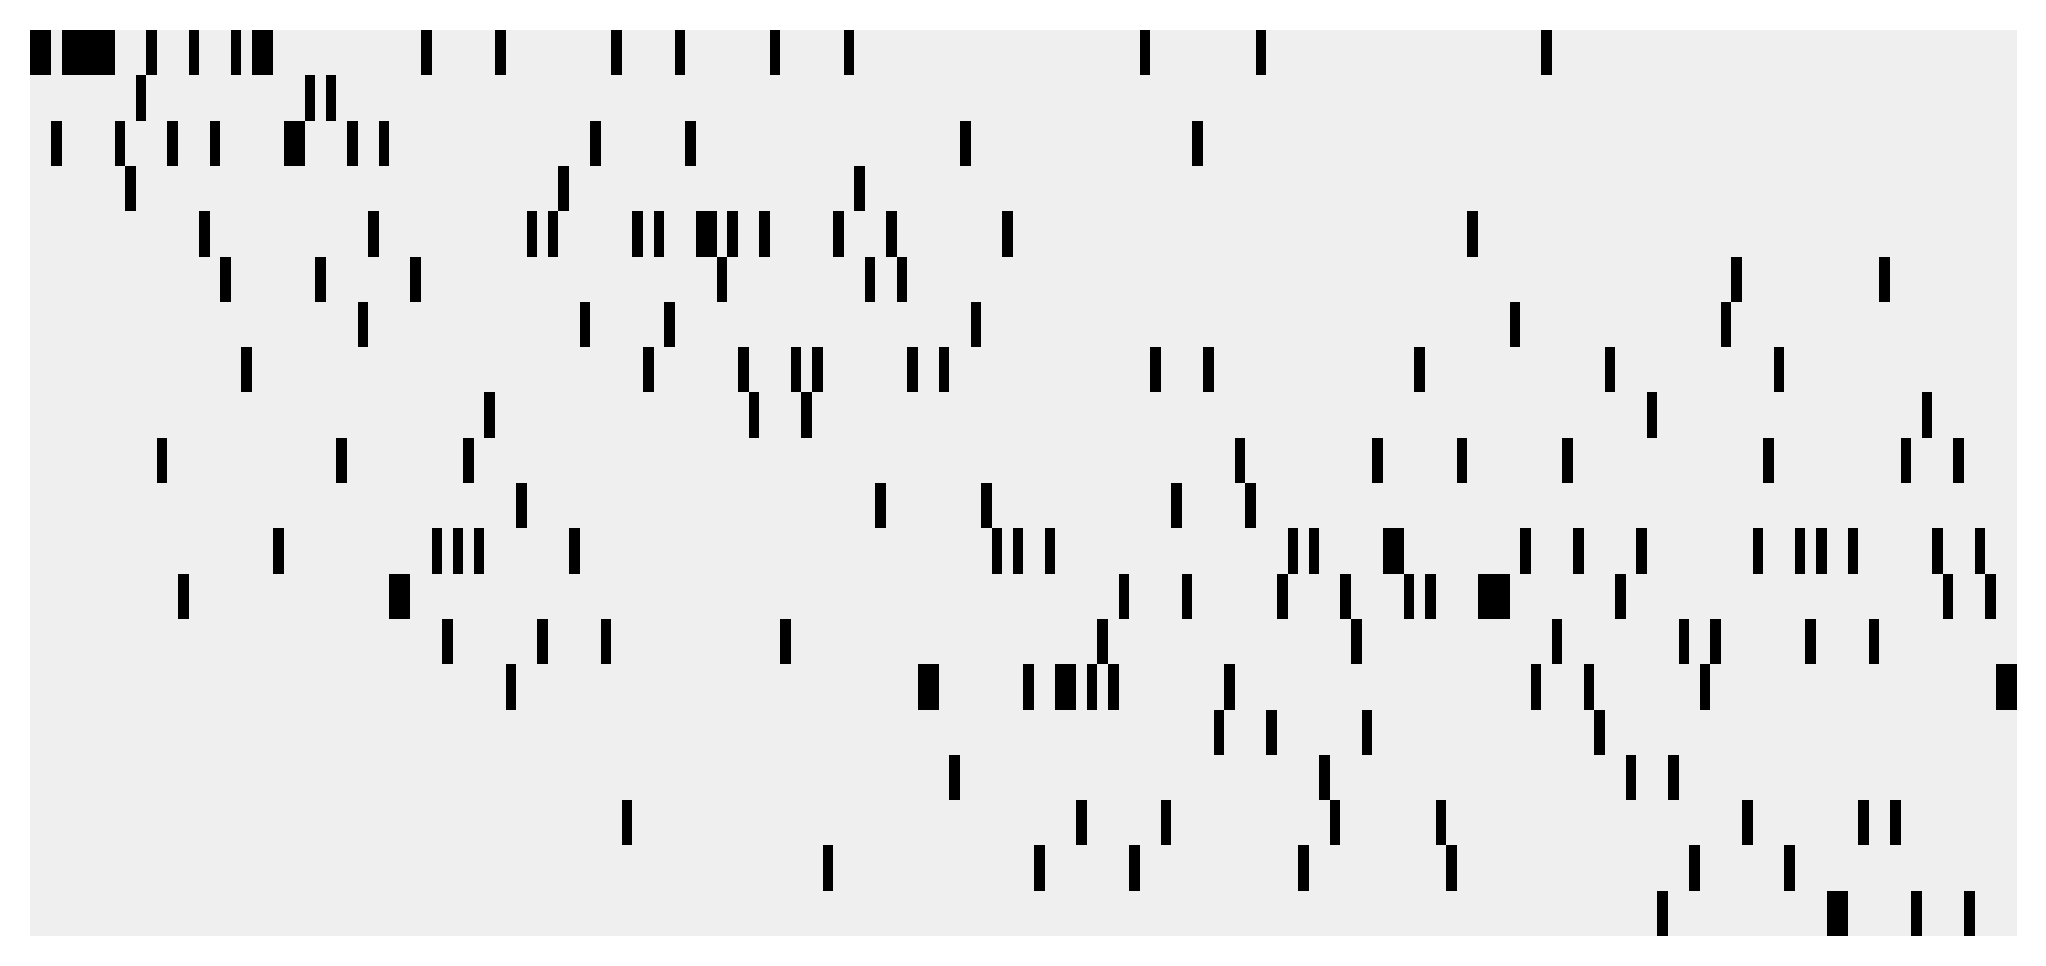

In [80]:
fig=plt.figure(figsize=(9*(n_up/198),4))
ax=fig.add_subplot(111)

sns.heatmap(sns_df.T,vmin=-0.15,vmax=1,cmap="Greys",cbar=False
           ,yticklabels=0,xticklabels=0,ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')

for i in sns_df.columns:
    print(i)
plt.savefig(path_to_results+"Figure6B_1.png",bbox_inches="tight")

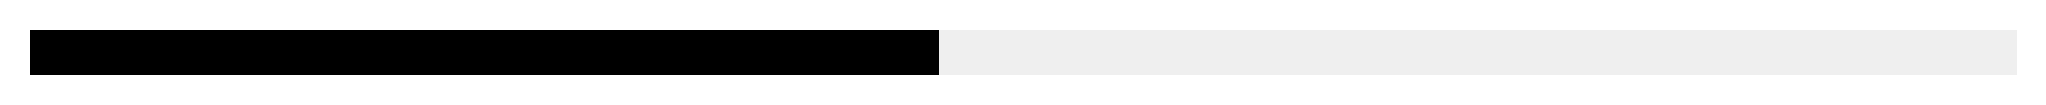

In [81]:
fig=plt.figure(figsize=(9*(n_up/198),0.2))
ax=fig.add_subplot(111)

sns.heatmap(df_drug_pvalues_up[["FDR<0.01"]].T,cmap="Greys",cbar=False,
            vmin=-0.15,vmax=1,xticklabels=0,yticklabels=0)

plt.savefig(path_to_results+"Figure6B_2.png",bbox_inches="tight")

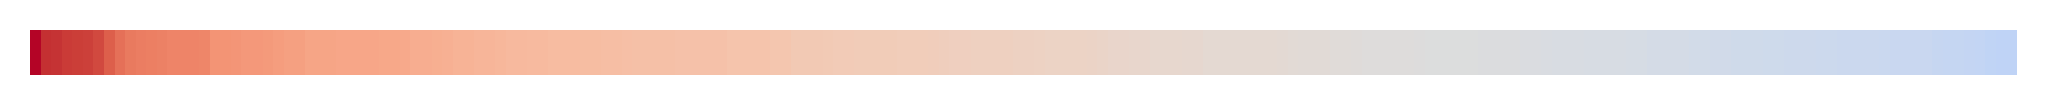

In [82]:
fig=plt.figure(figsize=(9*(n_up/198),0.2))
ax=fig.add_subplot(111)
sns.heatmap(df_drug_pvalues_up[["-log10_pvalue"]].T,cmap="coolwarm",cbar=False,
            vmin=0,vmax=7.5, center=-np.log10(0.05), xticklabels=0,yticklabels=0,ax=ax)
plt.savefig(path_to_results+"Figure6B_3.png",bbox_inches="tight")

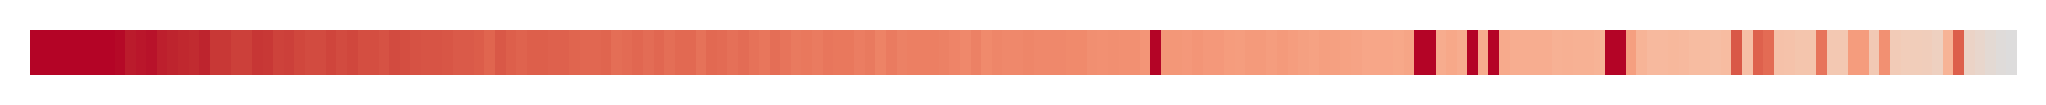

In [83]:
fig=plt.figure(figsize=(9*(n_up/198),0.2))
ax=fig.add_subplot(111)
sns.heatmap(df_drug_pvalues_up[["m_diff"]].T,cmap="coolwarm",cbar=False,
            vmin=-0.5,vmax=0.5,xticklabels=0,yticklabels=0,ax=ax)
plt.savefig(path_to_results+"Figure6B_4.png",bbox_inches="tight")

In [84]:
sns_df=df_drug_pvalues_dn.loc[:,col_order]

DNA damaging
PARP_inhibiotor
ERK MAPK signaling
p53 pathway
Chromatin related
Genome integrity
Microtubule inhibitor
Cell cycle
Protein stability and degradation
RTK signaling
IGF1R signaling
PI3K/MTOR signaling
Other molecular target
Apoptosis regulation
Kinase inhibitor
Hormone-related
Metabolism
WNT signaling
Others
EGFR signaling


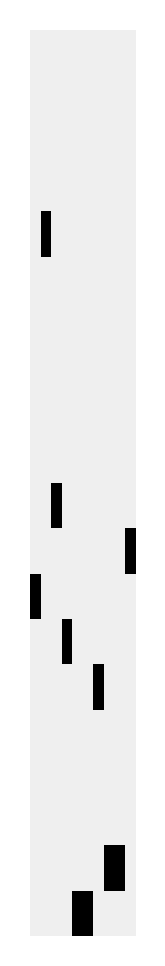

In [85]:
fig=plt.figure(figsize=(9*(n_dn/198),4))
ax=fig.add_subplot(111)

sns.heatmap(sns_df.T,vmin=-0.15,vmax=1,cmap="Greys",cbar=False
           ,yticklabels=0,xticklabels=0,ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')

for i in sns_df.columns:
    print(i)
plt.savefig(path_to_results+"Figure6B_5.png",bbox_inches="tight")

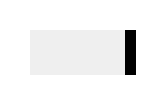

In [86]:
fig=plt.figure(figsize=(9*(n_dn/198),0.2))
ax=fig.add_subplot(111)

sns.heatmap(df_drug_pvalues_dn[["FDR<0.01"]].T,cmap="Greys",cbar=False,
            vmin=-0.15,vmax=1,xticklabels=0,yticklabels=0)

plt.savefig(path_to_results+"Figure6B_6.png",bbox_inches="tight")

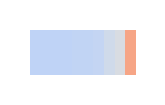

In [87]:
fig=plt.figure(figsize=(9*(n_dn/198),0.2))
ax=fig.add_subplot(111)
sns.heatmap(df_drug_pvalues_dn[["-log10_pvalue"]].T,cmap="coolwarm",cbar=False,
            vmin=0,vmax=7.5, center=-np.log10(0.05), xticklabels=0,yticklabels=0,ax=ax)
plt.savefig(path_to_results+"Figure6B_7.png",bbox_inches="tight")

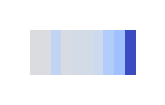

In [83]:
fig=plt.figure(figsize=(9*(n_dn/198),0.2))
ax=fig.add_subplot(111)
sns.heatmap(df_drug_pvalues_dn[["m_diff"]].T,cmap="coolwarm",cbar=False,
            vmin=-0.5,vmax=0.5,xticklabels=0,yticklabels=0,ax=ax)
plt.savefig(path_to_results+"Figure6B_8.png",bbox_inches="tight")

# colorbars

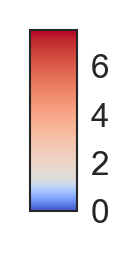

In [84]:
import matplotlib as mpl
cmap=plt.get_cmap("coolwarm")
vmin=0
vmax=7.5
bounds=[0,2,4,6]
fontsize=8
label=""
orientation='vertical'
norm = mpl.colors.TwoSlopeNorm(vmin=vmin, vmax=vmax,vcenter=1.3)

fig=plt.figure(figsize=(0.2,0.8))
ax=fig.add_subplot(111)
cbar = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm,
ticks=bounds, orientation=orientation,label=label,)
ax.tick_params(labelsize=fontsize)

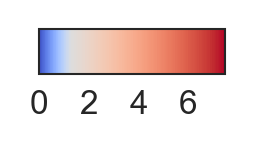

In [85]:
import matplotlib as mpl
cmap=plt.get_cmap("coolwarm")
vmin=0
vmax=7.5
bounds=[0,2,4,6]
fontsize=8
label=""
orientation='horizontal'
norm = mpl.colors.TwoSlopeNorm(vmin=vmin, vmax=vmax,vcenter=1.3)

fig=plt.figure(figsize=(0.8,0.2))
ax=fig.add_subplot(111)
cbar = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm,
ticks=bounds, orientation=orientation,label=label,)
ax.tick_params(labelsize=fontsize)

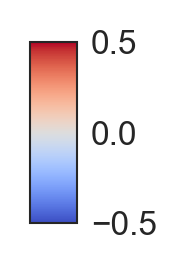

In [86]:
import matplotlib as mpl
cmap=plt.get_cmap("coolwarm")
vmin=-0.5
vmax=0.5
bounds=[-0.5,0,0.5]
fontsize=8
label=""
orientation='vertical'
norm = mpl.colors.TwoSlopeNorm(vmin=vmin, vmax=vmax,vcenter=0)

fig=plt.figure(figsize=(0.2,0.8))
ax=fig.add_subplot(111)
cbar = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm,
ticks=bounds, orientation=orientation,label=label,)
ax.tick_params(labelsize=fontsize)

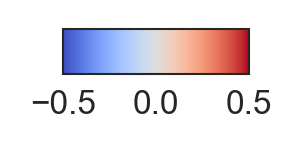

In [87]:
import matplotlib as mpl
cmap=plt.get_cmap("coolwarm")
vmin=-0.5
vmax=0.5
bounds=[-0.5,0,0.5]
fontsize=8
label=""
orientation='horizontal'
norm = mpl.colors.TwoSlopeNorm(vmin=vmin, vmax=vmax,vcenter=0)

fig=plt.figure(figsize=(0.8,0.2))
ax=fig.add_subplot(111)
cbar = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm,
ticks=bounds, orientation=orientation,label=label,)
ax.tick_params(labelsize=fontsize)

In [88]:
plt_df=plt_df0.copy()
value="TMB_log10"
plt_df=plt_df.dropna(subset=[value]).sort_values(by=value,ascending=False)
vmin=min(plt_df["TMB_log10"])
vmax=max(plt_df["TMB_log10"])

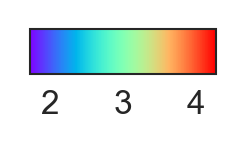

In [89]:
import matplotlib as mpl
cmap=plt.get_cmap("rainbow")
bounds=[2,3,4]
fontsize=8
label=""
orientation='horizontal'
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

fig=plt.figure(figsize=(0.8,0.2))
ax=fig.add_subplot(111)
cbar = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm,
ticks=bounds, orientation=orientation,label=label,)
ax.tick_params(labelsize=fontsize)